# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

real_estate_data.csv - данные, которые имеют следующие столбцы:

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### План выполнениея проекта

1. Провести поиск аномалий среди пропусков.
2. Разработать стратегию замены пустых значений.
3. Поиск несоотвествущих реальности значений или требованиям государства.
4. Приведение к нужному типу данных.
5. Дополнение дата фрейма столбцами на основе других столбцов
6. Проведение исследований и ответы на вопросы
7. Оформление и заключительный вывод.

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

Подключение необходимых библиотек.

In [1]:
import pandas as pd
import copy
import matplotlib.pyplot as plt 
import seaborn as sns

Подключение данных. Сохраним количество данных в отдельной переменной.

In [2]:
flats_sales_data = pd.read_csv('/datasets/real_estate_data.csv', sep="\t")
print(flats_sales_data.info())
flats_sales_data.head()
old_len_flats_sales_data = flats_sales_data.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Отобразим уникальные значения по каждому столбцу.


In [3]:
for column in flats_sales_data.columns:
    print(column)
    print(flats_sales_data[column].unique())
    print()

total_images
[20  7 10  0  2  6  5 18  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37]

last_price
[13000000.  3350000.  5196000. ...  6151120. 21400000. 11475000.]

total_area
[108.    40.4   56.   ...  66.86 133.81  76.75]

first_day_exposition
['2019-03-07T00:00:00' '2018-12-04T00:00:00' '2015-08-20T00:00:00' ...
 '2014-12-29T00:00:00' '2016-09-12T00:00:00' '2015-07-19T00:00:00']

rooms
[ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]

ceiling_height
[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82
  

In [4]:
flats_sales_data['first_day_exposition'].value_counts()

2018-02-01T00:00:00    368
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    111
2018-03-26T00:00:00     97
                      ... 
2015-08-18T00:00:00      1
2014-12-23T00:00:00      1
2017-03-05T00:00:00      1
2015-03-15T00:00:00      1
2018-05-01T00:00:00      1
Name: first_day_exposition, Length: 1491, dtype: int64

In [5]:
flats_sales_data['studio'].value_counts()

False    23550
True       149
Name: studio, dtype: int64

In [6]:
flats_sales_data[flats_sales_data['rooms']==0]['studio'].value_counts()

True     138
False     59
Name: studio, dtype: int64

In [7]:
flats_sales_data[flats_sales_data['rooms']==1]['studio'].value_counts()

False    8036
True       11
Name: studio, dtype: int64

In [8]:
flats_sales_data[flats_sales_data['studio']]['rooms'].value_counts()

0    138
1     11
Name: rooms, dtype: int64

In [9]:
flats_sales_data['living_area'].value_counts()

18.00    882
17.00    675
30.00    598
16.00    486
20.00    481
        ... 
20.03      1
10.55      1
24.83      1
20.97      1
15.55      1
Name: living_area, Length: 1782, dtype: int64

In [10]:
flats_sales_data['is_apartment'].isna().value_counts()

True     20924
False     2775
Name: is_apartment, dtype: int64

In [11]:
flats_sales_data['kitchen_area'].isna().value_counts()

False    21421
True      2278
Name: kitchen_area, dtype: int64

In [12]:
flats_sales_data['parks_around3000'].isna().value_counts()

False    18181
True      5518
Name: parks_around3000, dtype: int64

In [13]:
flats_sales_data['parks_around3000'].value_counts()

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

In [14]:
flats_sales_data['parks_nearest'].isna().value_counts()

True     15620
False     8079
Name: parks_nearest, dtype: int64

In [15]:
flats_sales_data['ponds_around3000'].isna().value_counts()

False    18181
True      5518
Name: ponds_around3000, dtype: int64

In [16]:
flats_sales_data['ponds_around3000'].value_counts()

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

In [17]:
flats_sales_data['ponds_nearest'].isna().value_counts()

True     14589
False     9110
Name: ponds_nearest, dtype: int64

In [18]:
flats_sales_data['days_exposition'].isna().value_counts()

False    20518
True      3181
Name: days_exposition, dtype: int64

In [19]:
flats_sales_data['days_exposition'].value_counts()

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
1110.0      1
1049.0      1
951.0       1
693.0       1
773.0       1
Name: days_exposition, Length: 1141, dtype: int64

In [20]:
flats_sales_data['days_exposition'][flats_sales_data['days_exposition'] == 0]

Series([], Name: days_exposition, dtype: float64)

In [21]:
flats_sales_data[flats_sales_data['locality_name'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.8,2,NaN,...,8.8,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.6,2,NaN,...,18.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,NaN,24.0,15.6,3,NaN,...,10.7,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,NaN,24.0,33.1,21,NaN,...,8.2,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,NaN,5.0,30.8,5,NaN,...,6.5,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0


### Вывод

Выделение типов переменных в flats_sales_data:

- Категориальные: locality_name.
- Количественные: total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, kitchen_area, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_nearest, ponds_around3000, days_exposition.
- Логические: is_apartment, studio, open_plan.


Выявлены следующие аномалии:

##### Случайного типа:

1. Значения rooms 1 или 0 при указании квартиры как студии. Здесь можно ошибиться не зная четких правил по определению количество комнат в студии. Или продавец не указал количество комнат, т.к. определен тип квартиры студия.
2. Значения False в studio при количестве комнат = 0. Относится к пропуску значения комнат, никак не связанных со студией. Продавец не указал количество комнат.
3. Значения NaN в столбце kitchen_area. Возможная потеря данных. Легко восстановить имея данные об общей площади.
4. Значения NaN в столце balcony. Возможная потеря данных или неуказание количество балконов в виду их отсутсвия.
5. Значения NaN в столце parks_around3000 и ponds_around3000. Возможная потеря данных или неуказание количество парков или прудов в виду их отсутсвия. 
6. Значения NaN в locality_name, cityCenters_nearest. days_exposition, ceiling_height, floors_total. Возможные потери данных.

##### Неслучайного типа:

1. Значение 0 в total_images. Возможно кто-то специально не хочет показывать квартиру ввиду ее отсутсвия или желания показать квартиру только при встрече.
2. Значение времени 00:00:00 в first_day_exposition. Точное время отправки на сайт продажи не требуется, нужен только день.
3. Значения NaN в is_apartment. Около 21000 квартир не имеют статуса в этой категории. Возможно продавцы не указали, жилая квартира для постоянного проживания или апартаменты для временного в виду своего незнания. 
4. Значения NaN в столце parks_nearest и ponds_nearest. Здесь можно было ориентироваться на количество пустых и 0 значений в столбце parks_around3000 и ponds_around3000 соответсвенно. Вывод сделан на примерной сумме пустых значений и 0.
5. Совпадение по количеству пропусков в parks_around3000 и ponds_around3000. Значит продавцы не указали эти факторы как значимые в своей публикации.

Числовые аномалии и несоотвествие значений реальности обработаем в шаге "Предобработка данных".

### Шаг 2. Предобработка данных

Проведем сводный анализ пропусков по каждому столцу и выявим столбцы:

- Где нужно избавиться от пропуков. 
- Невлияющие на гипотезы.
- Невозможно восстановить.

In [22]:
count_of_index = flats_sales_data.shape[0]
print('Всего значений в данных:', count_of_index)
for column in flats_sales_data.columns:
    isna_count = flats_sales_data[column].isna().value_counts()
    print('Количество пропусков в', column, ': ', count_of_index - isna_count[0])

Всего значений в данных: 23699
Количество пропусков в total_images :  0
Количество пропусков в last_price :  0
Количество пропусков в total_area :  0
Количество пропусков в first_day_exposition :  0
Количество пропусков в rooms :  0
Количество пропусков в ceiling_height :  9195
Количество пропусков в floors_total :  86
Количество пропусков в living_area :  1903
Количество пропусков в floor :  0
Количество пропусков в is_apartment :  20924
Количество пропусков в studio :  0
Количество пропусков в open_plan :  0
Количество пропусков в kitchen_area :  2278
Количество пропусков в balcony :  11519
Количество пропусков в locality_name :  49
Количество пропусков в airports_nearest :  5542
Количество пропусков в cityCenters_nearest :  5519
Количество пропусков в parks_around3000 :  5518
Количество пропусков в parks_nearest :  15620
Количество пропусков в ponds_around3000 :  5518
Количество пропусков в ponds_nearest :  14589
Количество пропусков в days_exposition :  3181


##### Столбцы с восстановлением пропуков

1. floors_total. Необходим для категоризации данных по расположению этажа в жилом доме.
2. living_area. Ключевой фактор для создания соотношения к общей площади.
3. kitchen_area. Ключевой фактор для создания соотношения к общей площади.
4. cityCenters_nearest. Ключевой фактор для определения удаленности от центра Санкт-Петербурга.
5. locality_name. Этот столбец имеет значения для гипотез. Но его можно восстановить, зная местоположение от центра.

#####  Столцбы, неимеющие значения для гипотез

1. is_apartment. Определение типа жилого помещения на постоянной основе с регистрацией, т.е. квартиры, и апартамента не имеет никакого значения для гипотез.
2. balcony. Этот столбец не имеет значения для гипотез. Но его легко восстановить.
3. parks_nearest и ponds_nearest. Эти столбцы не имеею значения для гипотез. Теоретически их можно восстановить из столбцов parks_around3000 и ponds_around3000.
4. airports_nearest, parks_around3000 и ponds_around3000. Количество в около 5500 значений говорит или о системной ошибке, или создании такого количество предложений с пропусками в этих значениях. Можно ориентироваться в пропусках на местоположение в locality_name. 


##### Стобцы, воостановления значений которых невозможно

1. ceiling_height. Пропущенных значений слишком много для достоверного восстановления картины.
2. locality_name и cityCenters_nearest, значения которых NaN. Эти предложения не подходят для некоторых гипотез. Соотвественно их можно удалить
3. days_exposition. Важный для нас столбец для определения успешности продаж, проставляет значение только по снятию продаж

#### Проверка на нереальные значения

Проверим нереальные значения для столцов floor и floors_total. Будем считать, что если указанный этаж выше этажности дома - это мошеннические действия и удалим данные строки.

In [23]:
unreal_floor = flats_sales_data.query('floor > floors_total')

unreal_floor.shape[0]

0

Таких квартир в данных нет.

Проверим нереальные значения для столбцов total_area, living_area и kitchen_area. Здесь необходим проверить следующее:

- Какое самое маленькое значние total_area и входит ли оно в стандарты по минимуму жилья
- Сумма значений living_area и kitchen_area не больше, чем total_area

Согласно СП 54.13330.2016 к квартире предъявляются требования по ее размеру в зависимости от комнат:

- 1 комната - минимальный размер 28 кв.м.
- 2 комнаты - минимальный размер 44 кв.м.
- 3 комнаты - минимальный размер 56 кв.м.
- 4 комнаты - минимальный размер 70 кв.м.
- 5 комнат - минимальный размер 103 кв.м.
- больше 5 комнат - минимальный размер равен количеству_комнат * 20 кв.м.

И требование к минимальному размеру кухни:

- 1 комната - минимальный размер кухни 5 кв.м.
- 2 комнаты и больше - минимальный размер кухни 6 кв.м.

Начнем с размера квартиры по количеству комнат. Если количество комнат равно 0, то заменим это значение на 1.

In [24]:
flats_sales_data['rooms'] = flats_sales_data['rooms'].replace(0,1)

unreal_rooms = flats_sales_data[flats_sales_data['rooms'] == 0]

len(unreal_rooms)

0

Проверим сколько квартир соответсвует стандарту по размеру общей площади.

In [25]:
flat_with_1_room = flats_sales_data[flats_sales_data['rooms'] == 1]
print(len(flat_with_1_room))

flat_with_2_rooms = flats_sales_data[flats_sales_data['rooms'] == 2]
print(len(flat_with_2_rooms))

flat_with_3_rooms = flats_sales_data[flats_sales_data['rooms'] == 3]
print(len(flat_with_3_rooms))

flat_with_4_rooms = flats_sales_data[flats_sales_data['rooms'] == 4]
print(len(flat_with_4_rooms))

flat_with_5_rooms = flats_sales_data[flats_sales_data['rooms'] == 5]
print(len(flat_with_5_rooms))

flat_with_lots_rooms = flats_sales_data[flats_sales_data['rooms'] > 5]
print(len(flat_with_lots_rooms))

8244
7940
5814
1180
326
195


In [26]:
good_flat_with_1_room = flats_sales_data.query('rooms == 1 and total_area >= 28')
print(good_flat_with_1_room.shape[0])

good_flat_with_2_rooms = flats_sales_data.query('rooms == 2 and total_area >= 44')
print(good_flat_with_2_rooms.shape[0])

good_flat_with_3_rooms = flats_sales_data.query('rooms == 3 and total_area >= 56')
print(good_flat_with_3_rooms.shape[0])

good_flat_with_4_rooms = flats_sales_data.query('rooms == 4 and total_area >= 70')
print(good_flat_with_4_rooms.shape[0])

good_flat_with_5_rooms = flats_sales_data.query('rooms == 5 and total_area >= 103')
print(good_flat_with_5_rooms.shape[0])

good_flat_with_lots_rooms = flats_sales_data.query('rooms > 5 and (total_area >= (rooms) * 20)')
print(good_flat_with_lots_rooms.shape[0])

7856
7099
5412
1038
284
174


In [27]:
good_flat_with_lots_rooms.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
52,20,11795000.0,136.0,2017-09-22T00:00:00,6,3.0,2.0,94.0,2,NaN,...,11.0,1.0,Санкт-Петербург,16510.0,6582.0,1.0,526.0,0.0,NaN,NaN
201,5,10880000.0,123.1,2015-11-12T00:00:00,6,3.2,5.0,89.0,2,NaN,...,11.0,NaN,Санкт-Петербург,26009.0,3369.0,2.0,516.0,0.0,NaN,992.0
464,15,66571000.0,280.3,2015-06-11T00:00:00,6,5.2,8.0,159.5,7,NaN,...,21.1,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
509,5,90000000.0,225.0,2016-06-26T00:00:00,6,NaN,4.0,134.0,2,NaN,...,19.5,2.0,Санкт-Петербург,32864.0,5720.0,0.0,NaN,2.0,519.0,416.0
581,20,65000000.0,365.0,2019-03-18T00:00:00,7,2.9,7.0,NaN,7,NaN,...,NaN,NaN,Санкт-Петербург,19827.0,1690.0,3.0,378.0,3.0,58.0,NaN


Как видно некоторые квартиры не соотвествуют стандарту государства. Оценим каков процент их содержания в данных.

In [28]:
all_flats = flats_sales_data.shape[0]
good_all_flats = (
    good_flat_with_1_room.shape[0] + 
    good_flat_with_2_rooms.shape[0] + 
    good_flat_with_3_rooms.shape[0] + 
    good_flat_with_4_rooms.shape[0] +
    good_flat_with_5_rooms.shape[0] +
    good_flat_with_lots_rooms.shape[0])
print(all_flats - good_all_flats, (all_flats - good_all_flats)/all_flats)

1836 0.07747162327524368


7.7% выборки не соответсвуют требованиям. Эти значения удалим из выборки, создав новый дата фрейм.

In [29]:
frames = [good_flat_with_1_room,good_flat_with_2_rooms, good_flat_with_3_rooms, 
          good_flat_with_4_rooms, good_flat_with_5_rooms, good_flat_with_lots_rooms]
good_flats_sales_data = pd.concat(frames)
good_flats_sales_data = good_flats_sales_data.sort_index()
good_flats_sales_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [30]:
flats_sales_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Ценные данные сохранены. Заменяем основную переменную данных.

In [31]:
flats_sales_data = good_flats_sales_data
flats_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21863 entries, 0 to 23698
Data columns (total 22 columns):
total_images            21863 non-null int64
last_price              21863 non-null float64
total_area              21863 non-null float64
first_day_exposition    21863 non-null object
rooms                   21863 non-null int64
ceiling_height          13483 non-null float64
floors_total            21788 non-null float64
living_area             20147 non-null float64
floor                   21863 non-null int64
is_apartment            2594 non-null object
studio                  21863 non-null bool
open_plan               21863 non-null bool
kitchen_area            20026 non-null float64
balcony                 11361 non-null float64
locality_name           21816 non-null object
airports_nearest        16992 non-null float64
cityCenters_nearest     17013 non-null float64
parks_around3000        17014 non-null float64
parks_nearest           7579 non-null float64
ponds_around300

Проверим сколько квартир соотвествует минимальному размеру кухни.

In [32]:
good_kitchen_with_1_room = flats_sales_data.query('rooms == 1 and kitchen_area >= 5')
print(good_kitchen_with_1_room.shape[0])

good_kitchen_with_lots_rooms = flats_sales_data.query('rooms > 1 and kitchen_area >= 6')
print(good_kitchen_with_lots_rooms.shape[0])

7102
12381


In [33]:
bad_kitchen = flats_sales_data.query('kitchen_area < 5')
print(bad_kitchen.shape[0], bad_kitchen.shape[0]/flats_sales_data.shape[0])

bad_index = bad_kitchen.index
print(bad_index)

flats_sales_data.drop(bad_index, inplace=True)
flats_sales_data.loc[1325:1330, :]

39 0.0017838357041577095
Int64Index([ 1327,  2684,  3356,  4777,  5415,  5514,  6200,  6908,  7436,
             7950,  8002,  8605,  9368,  9873, 11033, 11217, 12285, 12370,
            12474, 12595, 12891, 13814, 14183, 14188, 14836, 15014, 15586,
            15601, 16383, 17739, 17834, 18230, 18989, 19729, 20217, 20259,
            21020, 22075, 23498],
           dtype='int64')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1326,8,8100000.0,52.0,2017-01-29T00:00:00,2,2.7,25.0,9.0,15,NaN,...,32.0,2.0,Санкт-Петербург,35555.0,15561.0,0.0,NaN,1.0,1180.0,337.0
1329,18,6750000.0,71.0,2019-04-09T00:00:00,3,NaN,9.0,43.0,6,NaN,...,8.5,NaN,Санкт-Петербург,25195.0,14409.0,0.0,NaN,0.0,NaN,NaN
1330,8,8045000.0,69.2,2017-04-21T00:00:00,2,NaN,10.0,43.7,2,NaN,...,9.7,NaN,Санкт-Петербург,23617.0,5223.0,0.0,NaN,1.0,874.0,409.0


Плохие кухни составляют около 0.2% от всех квартир и они были удалены из выборки.

Суммы площадей жилых и кухонных, как они относяться к общей площади.

In [34]:
bad_sum_area =  flats_sales_data.query('(kitchen_area + living_area ) > total_area ')
bad_sum_area.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,NaN,...,6.20,NaN,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
551,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.70,19.0,30.55,2,NaN,...,9.28,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.0
601,12,5600000.0,53.70,2017-04-18T00:00:00,2,2.50,12.0,48.30,5,NaN,...,7.00,2.0,Санкт-Петербург,50477.0,13252.0,2.0,220.0,1.0,1250.0,167.0
696,1,3364930.0,34.69,2014-11-27T00:00:00,1,2.64,25.0,23.43,25,NaN,...,23.43,2.0,Санкт-Петербург,43396.0,12153.0,0.0,NaN,0.0,NaN,574.0
1060,10,5200000.0,50.00,2015-11-06T00:00:00,2,NaN,35.0,39.00,15,False,...,20.50,2.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,281.0
1155,11,7000000.0,38.00,2019-04-09T00:00:00,1,3.20,5.0,33.00,1,NaN,...,12.00,NaN,Санкт-Петербург,31501.0,3670.0,1.0,183.0,3.0,689.0,NaN
1354,14,7300000.0,54.50,2018-08-20T00:00:00,2,NaN,16.0,38.00,12,NaN,...,19.00,2.0,Санкт-Петербург,51030.0,14721.0,0.0,NaN,0.0,NaN,NaN
1854,3,6540000.0,60.20,2018-10-14T00:00:00,2,NaN,24.0,55.00,24,NaN,...,14.84,NaN,Санкт-Петербург,33606.0,14769.0,0.0,NaN,0.0,NaN,60.0
1992,5,4000000.0,37.40,2018-02-11T00:00:00,1,2.53,16.0,36.40,10,NaN,...,8.60,1.0,Санкт-Петербург,19979.0,21690.0,0.0,NaN,1.0,1052.0,74.0
3426,8,4280000.0,32.51,2019-04-16T00:00:00,1,2.80,11.0,28.85,8,NaN,...,7.89,2.0,Санкт-Петербург,14482.0,15254.0,1.0,602.0,0.0,NaN,7.0


В выборке имеются квартиры с неправильным указанием жилой и куханной площади. Суммарно они больше общей, значит это неправльные квартиры и они будут удалены.

In [35]:
bad_sum_area.query('kitchen_area == living_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
696,1,3364930.0,34.69,2014-11-27T00:00:00,1,2.64,25.0,23.43,25,NaN,...,23.43,2.0,Санкт-Петербург,43396.0,12153.0,0.0,NaN,0.0,NaN,574.0
11579,7,4300000.0,33.00,2016-05-13T00:00:00,1,NaN,16.0,26.00,14,NaN,...,26.00,0.0,Санкт-Петербург,37180.0,12702.0,0.0,NaN,0.0,NaN,180.0
21266,10,8800000.0,60.00,2018-07-23T00:00:00,2,3.15,6.0,35.00,4,NaN,...,35.00,NaN,Санкт-Петербург,16558.0,8089.0,1.0,531.0,2.0,518.0,NaN


Рассматривая данные о превышающей сумме жилой площади можно заметить:

- Значение жилой площади свопадает со значением кухоннной. Это мб ошибка в данных.
- Некоторые продавцы указывают часть кухонной площади, как жилую. Именно по этой причине может получится, что сумма этих площадей больше общей.

In [36]:
print(bad_sum_area.shape[0], bad_sum_area.shape[0]/flats_sales_data.shape[0])

bad_index = bad_sum_area.index
print(bad_index)

flats_sales_data.drop(bad_index, inplace=True)
flats_sales_data.loc[180:190, :]

54 0.002474340175953079
Int64Index([  184,   551,   601,   696,  1060,  1155,  1354,  1854,  1992,
             3426,  3891,  4366,  5096,  6802,  7239,  7398,  7680,  8211,
             9333,  9385,  9834, 10652, 10913, 11046, 11313, 11472, 11579,
            11594, 12159, 12482, 12530, 12587, 13428, 15513, 16325, 16598,
            16911, 17110, 17151, 17492, 18455, 19344, 19535, 19908, 20034,
            20490, 21266, 21377, 21519, 21824, 21868, 21915, 21956, 23202],
           dtype='int64')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
180,11,3850000.0,31.7,2018-08-02T00:00:00,1,2.5,5.0,17.9,2,NaN,...,5.6,2.0,Санкт-Петербург,10709.0,10933.0,0.0,NaN,0.0,NaN,8.0
181,2,7900000.0,71.8,2017-08-23T00:00:00,3,3.0,5.0,38.7,1,NaN,...,12.0,NaN,Санкт-Петербург,22036.0,3301.0,0.0,NaN,1.0,585.0,NaN
182,16,3400000.0,60.0,2017-10-10T00:00:00,3,2.5,5.0,44.1,1,NaN,...,6.0,NaN,Красное Село,26090.0,29514.0,0.0,NaN,0.0,NaN,98.0
185,8,8500000.0,49.9,2018-10-20T00:00:00,1,3.0,16.0,18.9,14,NaN,...,10.6,NaN,Санкт-Петербург,12114.0,8946.0,1.0,749.0,1.0,833.0,145.0
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.8,4,NaN,...,12.0,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
187,9,4300000.0,52.3,2017-10-06T00:00:00,2,NaN,12.0,29.8,4,NaN,...,10.9,NaN,Санкт-Петербург,32794.0,13643.0,0.0,NaN,0.0,NaN,69.0
188,15,4600000.0,38.5,2019-04-16T00:00:00,1,2.5,12.0,18.5,5,NaN,...,NaN,NaN,Санкт-Петербург,49065.0,16735.0,1.0,501.0,0.0,NaN,NaN
189,0,6150000.0,62.0,2017-10-13T00:00:00,3,NaN,9.0,41.5,5,NaN,...,8.5,2.0,Санкт-Петербург,41954.0,12168.0,1.0,10.0,0.0,NaN,45.0
190,4,5200000.0,62.8,2016-06-01T00:00:00,3,NaN,9.0,39.7,2,NaN,...,9.7,0.0,Санкт-Петербург,12988.0,15579.0,0.0,NaN,2.0,898.0,233.0


Было удалено около 0.3% неверных квартир с неправльными данными по планировке.

Проверим нереальные значения для столбца ceiling_height. Выявим стандартное требования к высоте потолков.

Согласно СП 54.13330.2011 район относиться к климатическому району IIВ соответсвенно минимальная высота потолков должна быть 2.5 м.

In [37]:
good_ceiling_height = flats_sales_data[flats_sales_data['ceiling_height'] >= 2.5]
not_nan_ceiling_height = flats_sales_data['ceiling_height'].isna().value_counts()[0]
print(not_nan_ceiling_height - len(good_ceiling_height), (not_nan_ceiling_height - len(good_ceiling_height))/flats_sales_data.shape[0])

55 0.0025264124942581535


В данных 55 значений не соответсвуют требованиям. Это около 0,2% от всей выборки, значения удалим из выборки.

In [38]:
bad_ceiling_height = flats_sales_data[flats_sales_data['ceiling_height'] < 2.5]
bad_ceiling_height.head()
bad_index = bad_ceiling_height.index
print(bad_index)
flats_sales_data.drop(bad_index, inplace=True)
flats_sales_data.loc[190:200, :]

Int64Index([  193,   552,  1078,  1582,  1677,  2572,  3633,  3703,  4212,
             5498,  5542,  5735,  5850,  5918,  5941,  6066,  7270,  7644,
             7791,  9192, 10160, 11125, 11352, 11485, 11868, 12069, 13271,
            13462, 14345, 14463, 14491, 15444, 15453, 15939, 16446, 16884,
            16934, 17408, 17601, 17794, 18900, 19098, 19907, 20085, 20520,
            20564, 21180, 21349, 21521, 22411, 22462, 22590, 22960, 23121,
            23496],
           dtype='int64')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
190,4,5200000.0,62.8,2016-06-01T00:00:00,3,NaN,9.0,39.7,2,NaN,...,9.7,0.0,Санкт-Петербург,12988.0,15579.0,0.0,NaN,2.0,898.0,233.0
192,14,3270000.0,39.4,2017-04-17T00:00:00,1,NaN,24.0,19.2,9,NaN,...,11.0,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,79.0
194,19,7700000.0,85.0,2019-02-07T00:00:00,3,2.70,10.0,50.0,1,NaN,...,11.0,NaN,Санкт-Петербург,15923.0,14719.0,0.0,NaN,1.0,212.0,50.0
195,8,5300000.0,60.0,2016-05-19T00:00:00,3,NaN,9.0,NaN,4,NaN,...,NaN,0.0,Санкт-Петербург,52072.0,17061.0,1.0,1133.0,3.0,239.0,372.0
196,7,8715960.0,57.0,2017-06-29T00:00:00,1,NaN,5.0,20.0,5,NaN,...,16.0,0.0,Санкт-Петербург,17462.0,16465.0,1.0,1205.0,2.0,97.0,119.0
197,5,1600000.0,46.0,2016-04-22T00:00:00,2,NaN,5.0,NaN,2,False,...,NaN,1.0,Сясьстрой,NaN,NaN,NaN,NaN,NaN,NaN,171.0
198,7,2900000.0,35.0,2015-02-04T00:00:00,1,2.70,17.0,16.1,17,False,...,8.3,2.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,586.0
199,4,3735325.0,37.4,2019-03-22T00:00:00,1,2.73,12.0,17.0,4,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,21.0
200,13,9150000.0,98.3,2018-06-30T00:00:00,3,2.84,13.0,60.3,11,NaN,...,12.5,1.0,Ломоносов,48910.0,52334.0,0.0,NaN,2.0,582.0,271.0


#### Восстановление пропусков

Пропуски в floors_total заменим, изучив этаж квартиры и популярные значения всех этажей в доме по данным.

In [39]:
print(flats_sales_data[flats_sales_data['floors_total'].isna()]['floor'].value_counts())
flats_sales_data['floors_total'].value_counts()

4     8
8     8
6     7
12    6
9     5
3     4
11    3
7     3
21    3
19    3
18    3
5     3
13    3
10    3
2     2
24    2
14    2
20    2
1     2
22    1
15    1
17    1
Name: floor, dtype: int64


5.0     4844
9.0     3596
16.0    1334
12.0    1300
10.0    1154
4.0     1065
25.0    1024
6.0      857
17.0     807
3.0      570
7.0      567
14.0     531
18.0     474
24.0     435
8.0      371
15.0     344
23.0     339
19.0     311
22.0     274
2.0      269
20.0     267
13.0     225
11.0     197
27.0     154
21.0     143
26.0     123
28.0      21
35.0      21
1.0       15
36.0       3
29.0       1
60.0       1
33.0       1
52.0       1
34.0       1
Name: floors_total, dtype: int64

Дома с указанным этажом квартиры и отсутвием максимального этажа в доме скорей всего подтверждает, что продавец по-умолчанию указал последний этаж в доме, раз не повторил эту информацию. Сводный анализ по количеству этажей по домам говорит о том, что все строки с пропусками встречаются в выборке по максимальной этажности здания. 

Соотвественно будем считать, что указанный этаж являеятеся последним этажом в доме.

In [40]:
flats_sales_data['floors_total'] = flats_sales_data['floors_total'].fillna(0)

def fill_floors_total(row):
    if row[6] == 0:
        row[6] = row[8]
    return row

flats_sales_data = flats_sales_data.apply(fill_floors_total, axis=1)

flats_sales_data['floors_total'].isna().value_counts()

False    21715
Name: floors_total, dtype: int64

Попуски в living_area заполним, взяв за основу среднее соотношение жилой площади к общей.

In [41]:
living_area_ratio_mean = (flats_sales_data['living_area'] / flats_sales_data['total_area']).mean()
living_area_ratio_median = (flats_sales_data['living_area'] / flats_sales_data['total_area']).median()
print(living_area_ratio_mean, living_area_ratio_median, living_area_ratio_mean/living_area_ratio_median)

0.5550167163529487 0.5594938980617372 0.9919978006475157


Для сравнения полученных результатов из отношения значений в строке, возмем результаты, примененные к выборке в целом.

In [42]:
living_area_mean = flats_sales_data['living_area'].mean()
living_area_median = flats_sales_data['living_area'].median()
print(living_area_mean, living_area_median, living_area_mean/living_area_median)
total_area_mean = flats_sales_data['total_area'].mean()
total_area_median = flats_sales_data['total_area'].median()
print(total_area_mean, total_area_median, total_area_mean/total_area_median)
living_area_ratio_mean_series = living_area_mean / total_area_mean
living_area_ratio_median_series = living_area_median / total_area_median
print(living_area_ratio_mean_series, living_area_ratio_median_series, living_area_ratio_mean_series/ living_area_ratio_median_series)

34.882355840016 30.4 1.1474459157899999
61.883714943587385 54.0 1.145994721177544
0.563675853523248 0.5629629629629629 1.0012663187584012


Применим процент жилой площади из переменной living_area_ratio_mean. Заполним пустоты основывась на знании total_area по формуле:
    *living_area = total_area * living_area_ratio_mean*

In [43]:
flats_sales_data['living_area'] = flats_sales_data['living_area'].fillna(0)

def fill_living_area(row):
    if row[7] == 0:
        row[7] = float(format(row[2] * living_area_ratio_mean, '.2f'))
    return row

flats_sales_data = flats_sales_data.apply(fill_living_area, axis=1)

flats_sales_data['living_area'].isna().value_counts()

False    21715
Name: living_area, dtype: int64

Пропуски в is_apartment заменим на False, так как отсуствие по этому пункту говорит нам, что перед нами обычная квартира.

In [44]:
flats_sales_data['is_apartment'] = flats_sales_data['is_apartment'].fillna(False)

flats_sales_data['is_apartment'].isna().value_counts()

False    21715
Name: is_apartment, dtype: int64

Для пропусков в столбце kitchen_area проанализируем соотношение

In [45]:
kitchen_area_ratio_mean = (flats_sales_data['kitchen_area'] / flats_sales_data['total_area']).mean()
kitchen_area_ratio_median = (flats_sales_data['kitchen_area'] / flats_sales_data['total_area']).median()
print(kitchen_area_ratio_mean, kitchen_area_ratio_median, kitchen_area_ratio_mean/kitchen_area_ratio_median)

0.19024131084498055 0.17696629213483145 1.0750143914414776


Для заполнения будем использовать среднее соотношение. Если произведение общей площади на это соотношение даст значение меньше 5 кв.м. то будет использовать константу в 5 кв.м.

In [46]:
flats_sales_data['kitchen_area'] = flats_sales_data['kitchen_area'].fillna(0)

def fill_kitchen_area(row):
    if row[12] == 0:
        normal_fill_kitchen = float(format(row[2] * kitchen_area_ratio_mean, '.2f'))
        if row[4] == 1:
            if normal_fill_kitchen >= 5:
                row[12] = normal_fill_kitchen
            else:
                row[12] = 5
        elif row[4] > 1:
            if normal_fill_kitchen >= 6:
                row[12] = normal_fill_kitchen
            else:
                row[12] = 6
    return row

flats_sales_data = flats_sales_data.apply(fill_kitchen_area, axis=1)

flats_sales_data['kitchen_area'].unique()

array([25.  , 11.  ,  8.3 , ..., 17.87, 15.28, 13.83])

Для пропусков в столбце balcony установим значение 0.

In [47]:
flats_sales_data['balcony'] = flats_sales_data['balcony'].fillna(0)
flats_sales_data['balcony'].isna().value_counts()

False    21715
Name: balcony, dtype: int64

Посмотрим, какие значения пропущены в locality_name.

In [48]:
nan_locality_name = flats_sales_data[flats_sales_data['locality_name'].isna()]
nan_locality_name.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.8,2,False,...,8.8,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.6,2,False,...,18.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,NaN,24.0,15.6,3,False,...,10.7,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,NaN,24.0,33.1,21,False,...,8.2,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,NaN,5.0,30.8,5,False,...,6.5,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0


Невозможно восстановить данные, если в cityCenters_nearest стоит NaN. Удалим эти значения.

In [49]:
bad_locality_name = nan_locality_name[nan_locality_name['cityCenters_nearest'].isna()]
bad_locality_name.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.60,2,False,...,18.60,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
14342,3,3611000.0,53.5,2017-04-27T00:00:00,1,NaN,4.0,25.80,3,False,...,10.18,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0
17535,2,5985000.0,79.8,2018-07-30T00:00:00,3,NaN,9.0,44.29,2,False,...,15.18,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213.0
20382,8,1750000.0,72.9,2018-10-27T00:00:00,3,NaN,5.0,47.30,2,False,...,8.30,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20590,7,3380000.0,56.0,2017-11-06T00:00:00,2,2.7,4.0,29.00,3,False,...,10.00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0


In [50]:
bad_index = bad_locality_name.index
print(bad_index)

flats_sales_data.drop(bad_index, inplace=True)
flats_sales_data.loc[2030:2040, :]

Int64Index([2033, 14342, 17535, 20382, 20590, 21715, 21898, 22717], dtype='int64')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2030,0,14500000.0,107.0,2018-12-16T00:00:00,3,NaN,16.0,53.0,8,False,...,27.0,0.0,Санкт-Петербург,39408.0,11111.0,0.0,NaN,0.0,NaN,75.0
2031,10,7800000.0,83.0,2018-07-31T00:00:00,3,2.65,16.0,49.3,7,False,...,12.0,0.0,Санкт-Петербург,20473.0,22185.0,0.0,NaN,0.0,NaN,NaN
2032,5,4350000.0,44.7,2019-04-25T00:00:00,2,2.55,5.0,29.4,1,False,...,5.5,0.0,Санкт-Петербург,45872.0,14086.0,0.0,NaN,0.0,NaN,7.0
2034,12,4300000.0,60.0,2018-06-27T00:00:00,2,NaN,11.0,35.0,1,False,...,11.0,0.0,посёлок Парголово,55616.0,21291.0,0.0,NaN,0.0,NaN,66.0
2035,19,4600000.0,49.5,2016-03-26T00:00:00,2,NaN,15.0,27.5,10,False,...,10.0,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,746.0
2036,19,6100000.0,50.0,2018-03-24T00:00:00,2,2.60,5.0,29.0,5,False,...,9.0,1.0,Зеленогорск,71618.0,52717.0,3.0,37.0,1.0,926.0,72.0
2037,20,7800000.0,97.3,2019-04-06T00:00:00,3,2.80,5.0,43.9,2,False,...,11.5,0.0,Санкт-Петербург,20562.0,19565.0,1.0,394.0,0.0,NaN,NaN
2038,10,3590000.0,35.0,2019-05-01T00:00:00,1,2.75,17.0,16.5,4,False,...,9.6,0.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2039,3,13520000.0,162.8,2018-03-21T00:00:00,7,3.00,4.0,121.6,4,False,...,15.9,0.0,Санкт-Петербург,20631.0,1899.0,3.0,360.0,3.0,153.0,NaN
2040,7,3400000.0,49.0,2018-12-17T00:00:00,2,NaN,19.0,30.0,6,False,...,10.0,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,7.0


Проведем поиск расстояния по указанному locality_name от центра Санкт-Петербурга. Начнем с категоризации местоположения.

In [51]:
print(flats_sales_data['locality_name'].value_counts())
flats_sales_data['locality_name'].unique()

Санкт-Петербург        14676
посёлок Мурино           454
посёлок Шушары           415
Всеволожск               370
Пушкин                   338
                       ...  
посёлок Шугозеро           1
деревня Чудской Бор        1
поселок Починок            1
деревня Раздолье           1
деревня Пельгора           1
Name: locality_name, Length: 345, dtype: int64


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Петергоф', 'Гатчина',
       'поселок Мурино', 'деревня Фёдоровское', 'Выборг', 'Кронштадт',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'посёлок Плодовое', 'деревня Заклинье', 'поселок Торковичи',
       'поселок Первомайское', 'Красное Село', 'Сясьстрой',
       'посёлок Понтонный', 'деревня Старая', 'деревня Лесколово',
       'Сланцы', 'село Путилово', 'Ивангород', 'Мурино', 

В названиях имеются дубликаты к примеру посёлок Мурино, поселок Мурино и Мурино. Проведем работу над приведением к одному виду столбца locality_name.

In [52]:
flats_sales_data_copy = copy.deepcopy(flats_sales_data)

bad_locality_name = flats_sales_data_copy[flats_sales_data_copy['locality_name'].isna()]

bad_index = bad_locality_name.index
print(bad_index)

flats_sales_data_copy.drop(bad_index, inplace=True)

def make_short_name(row):
    #print(1, row)
    split_name = row.split()
    new_name = []
    for word in split_name:
        if word[0].isupper():
            new_name.append(word)
    new_name = ' '.join(word for word in new_name)
    #print(2, new_name)
    return new_name

    
flats_sales_data_copy['short_locality_name'] = flats_sales_data_copy['locality_name'].apply(make_short_name)

short_locality_name_keys = flats_sales_data_copy['short_locality_name'].unique()
short_locality_name_keys

Int64Index([ 1097,  2603,  2632,  3574,  4151,  4189,  4670,  5343,  5707,
             6765,  7114,  7330,  7600,  8568,  8986,  9821, 10122, 12879,
            12936, 13223, 13690, 14273, 15686, 15866, 16499, 16561, 16610,
            17764, 18526, 18917, 19045, 19972, 20057, 20654, 21276, 21333,
            22474, 22933, 23214],
           dtype='int64')


array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Пушкин', 'Кудрово', 'Коммунар',
       'Колпино', 'Красный Бор', 'Петергоф', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Новое Девяткино', 'Металлострой',
       'Лебяжье', 'Сиверский', 'Молодцово', 'Кузьмоловский',
       'Новая Ропша', 'Павловск', 'Пикколово', 'Всеволожск', 'Волхов',
       'Кингисепп', 'Приозерск', 'Сестрорецк', 'Куттузи', 'Аннино',
       'Плодовое', 'Заклинье', 'Торковичи', 'Первомайское',
       'Красное Село', 'Сясьстрой', 'Понтонный', 'Старая', 'Лесколово',
       'Сланцы', 'Путилово', 'Ивангород', 'Шлиссельбург', 'Кировск',
       'Никольское', 'Зеленогорск', 'Сосновый Бор', 'Кальтино',
       'Романовка', 'Бугры', 'Рощино', 'Луга', 'Волосово', 'Павлово',
       'Оредеж', 'Молодёжное', 'Победа', 'Нурма', 'Тосно', 'Новый Свет',
       'Стрельна', 'Бокситогорск', 'Александровская', 'Пикалёво',
       'Терволово', 'Советский', 'Кириши', 'Подпорожье

Мы создали список имен для словаря, теперь соотнесем и найдем среднее растояние от названия местности с центром города. Это поможет на заполнить пропуски в locality_name и cityCenters_nearest.

In [53]:
flats_sales_data_copy['short_locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Пушкин', 'Кудрово', 'Коммунар',
       'Колпино', 'Красный Бор', 'Петергоф', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Новое Девяткино', 'Металлострой',
       'Лебяжье', 'Сиверский', 'Молодцово', 'Кузьмоловский',
       'Новая Ропша', 'Павловск', 'Пикколово', 'Всеволожск', 'Волхов',
       'Кингисепп', 'Приозерск', 'Сестрорецк', 'Куттузи', 'Аннино',
       'Плодовое', 'Заклинье', 'Торковичи', 'Первомайское',
       'Красное Село', 'Сясьстрой', 'Понтонный', 'Старая', 'Лесколово',
       'Сланцы', 'Путилово', 'Ивангород', 'Шлиссельбург', 'Кировск',
       'Никольское', 'Зеленогорск', 'Сосновый Бор', 'Кальтино',
       'Романовка', 'Бугры', 'Рощино', 'Луга', 'Волосово', 'Павлово',
       'Оредеж', 'Молодёжное', 'Победа', 'Нурма', 'Тосно', 'Новый Свет',
       'Стрельна', 'Бокситогорск', 'Александровская', 'Пикалёво',
       'Терволово', 'Советский', 'Кириши', 'Подпорожье

In [54]:
locality_and_cityCenter_dict = {}

bad_cityCenters_nearest = flats_sales_data_copy[flats_sales_data_copy['cityCenters_nearest'].isna()]

bad_index = bad_cityCenters_nearest.index
print(bad_index)

flats_sales_data_copy.drop(bad_index, inplace=True)
print(flats_sales_data_copy['short_locality_name'].unique())

def make_locality_and_cityCenter_dict(data_frame):
    for name in short_locality_name_keys:
        mean = data_frame[data_frame['short_locality_name'] == name]['cityCenters_nearest'].mean()
        locality_and_cityCenter_dict[name] = mean
        
make_locality_and_cityCenter_dict(flats_sales_data_copy)
locality_and_cityCenter_dict

Int64Index([    5,     8,    12,    22,    30,    37,    38,    47,    60,
               62,
            ...
            23655, 23666, 23670, 23677, 23679, 23682, 23692, 23695, 23696,
            23698],
           dtype='int64', length=4790)
['Санкт-Петербург' 'Шушары' 'Парголово' 'Ломоносов' 'Пушкин' 'Колпино'
 'Петергоф' 'Кронштадт' 'Металлострой' 'Павловск' 'Сестрорецк'
 'Красное Село' 'Понтонный' 'Зеленогорск' 'Молодёжное' 'Стрельна'
 'Александровская' 'Репино' 'Сапёрный' 'Белоостров' 'Песочный' 'Мурино'
 'Лисий Нос' 'Усть-Ижора']


{'Санкт-Петербург': 11609.27830608196,
 'Шушары': 24288.4806763285,
 'Янино-1': nan,
 'Парголово': 19916.949843260187,
 'Мурино': 21888.0,
 'Ломоносов': 50495.57943925234,
 'Сертолово': nan,
 'Пушкин': 28861.513353115726,
 'Кудрово': nan,
 'Коммунар': nan,
 'Колпино': 32208.33552631579,
 'Красный Бор': nan,
 'Петергоф': 35962.306818181816,
 'Гатчина': nan,
 'Фёдоровское': nan,
 'Выборг': nan,
 'Кронштадт': 49086.10588235294,
 'Новое Девяткино': nan,
 'Металлострой': 27510.701754385966,
 'Лебяжье': nan,
 'Сиверский': nan,
 'Молодцово': nan,
 'Кузьмоловский': nan,
 'Новая Ропша': nan,
 'Павловск': 33294.78125,
 'Пикколово': nan,
 'Всеволожск': nan,
 'Волхов': nan,
 'Кингисепп': nan,
 'Приозерск': nan,
 'Сестрорецк': 34591.63742690058,
 'Куттузи': nan,
 'Аннино': nan,
 'Плодовое': nan,
 'Заклинье': nan,
 'Торковичи': nan,
 'Первомайское': nan,
 'Красное Село': 30035.9,
 'Сясьстрой': nan,
 'Понтонный': 32201.777777777777,
 'Старая': nan,
 'Лесколово': nan,
 'Сланцы': nan,
 'Путилово': nan,

Из проведенной обработки данных видно, что не все объявления имеют расстояния и многие деревни, поселки и города не имеют расстояния от центра Санкт-Петербурга. Для гипотезы по расстоянию от центра важны только квартиры в Санкт-Петербурге. Для этого проверим сколько сейчас пропусков в расстоянии с указанным городом Санкт-Петербург.

In [55]:
locality_and_cityCenter_dict = {}
short_locality_name_keys = flats_sales_data_copy['short_locality_name'].unique()
make_locality_and_cityCenter_dict(flats_sales_data_copy)
print(locality_and_cityCenter_dict)

SP_flats_sales_data = flats_sales_data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest.isna()')
SP_flats_sales_data['cityCenters_nearest'].isna().value_counts()

{'Санкт-Петербург': 11609.27830608196, 'Шушары': 24288.4806763285, 'Парголово': 19916.949843260187, 'Ломоносов': 50495.57943925234, 'Пушкин': 28861.513353115726, 'Колпино': 32208.33552631579, 'Петергоф': 35962.306818181816, 'Кронштадт': 49086.10588235294, 'Металлострой': 27510.701754385966, 'Павловск': 33294.78125, 'Сестрорецк': 34591.63742690058, 'Красное Село': 30035.9, 'Понтонный': 32201.777777777777, 'Зеленогорск': 54741.22727272727, 'Молодёжное': 65894.66666666667, 'Стрельна': 23366.76923076923, 'Александровская': 27468.0, 'Репино': 42781.0, 'Сапёрный': 35852.25, 'Белоостров': 38868.0, 'Песочный': 27083.5, 'Мурино': 21888.0, 'Лисий Нос': 27297.0, 'Усть-Ижора': 28222.5}


True    59
Name: cityCenters_nearest, dtype: int64

Только для этих 59 значений мы восстановим среднее расстояние от центра города.

Для объявлений, чье расстояние от центра менее 15 км, заменим пропуск на Санкт-Петебург. Все остальные пропуски зададим расположение "За пределами города".

In [56]:
flats_sales_data['locality_name'] = flats_sales_data['locality_name'].fillna('empty')
print(flats_sales_data[flats_sales_data['locality_name'] == 'empty']['cityCenters_nearest'].value_counts())

def fill_locality_name(row):
    if row[14] == 'empty':
        if row[16] < 15000:
            row[14] = 'Санкт-Петебург'
        else:
            row[14] = 'За пределами города'
    return row

flats_sales_data = flats_sales_data.apply(fill_locality_name, axis=1)
flats_sales_data.info()

17369.0    8
4258.0     2
12332.0    2
8943.0     2
9538.0     1
3902.0     1
5382.0     1
1322.0     1
4627.0     1
10976.0    1
3801.0     1
3312.0     1
4604.0     1
9633.0     1
1780.0     1
23659.0    1
41294.0    1
9497.0     1
8619.0     1
3039.0     1
16788.0    1
4065.0     1
4383.0     1
4474.0     1
8429.0     1
8127.0     1
4805.0     1
31813.0    1
8582.0     1
Name: cityCenters_nearest, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21707 entries, 0 to 23698
Data columns (total 22 columns):
total_images            21707 non-null int64
last_price              21707 non-null float64
total_area              21707 non-null float64
first_day_exposition    21707 non-null object
rooms                   21707 non-null int64
ceiling_height          13364 non-null float64
floors_total            21707 non-null float64
living_area             21707 non-null float64
floor                   21707 non-null int64
is_apartment            21707 non-null bool
studio        

parks_around3000 и ponds_around3000  заполним значениями 0.

In [57]:
flats_sales_data['parks_around3000'] = flats_sales_data['parks_around3000'].fillna('0')
flats_sales_data['ponds_around3000'] = flats_sales_data['ponds_around3000'].fillna('0')
flats_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21707 entries, 0 to 23698
Data columns (total 22 columns):
total_images            21707 non-null int64
last_price              21707 non-null float64
total_area              21707 non-null float64
first_day_exposition    21707 non-null object
rooms                   21707 non-null int64
ceiling_height          13364 non-null float64
floors_total            21707 non-null float64
living_area             21707 non-null float64
floor                   21707 non-null int64
is_apartment            21707 non-null bool
studio                  21707 non-null bool
open_plan               21707 non-null bool
kitchen_area            21707 non-null float64
balcony                 21707 non-null float64
locality_name           21707 non-null object
airports_nearest        16896 non-null float64
cityCenters_nearest     16917 non-null float64
parks_around3000        21707 non-null object
parks_nearest           7535 non-null float64
ponds_around3000 

Заполнение столцов airports_nearest, cityCenters_nearest и ponds_nearest не требуется из условий гипотез.

Добавим дополнительный столбец date по first_day_exposition. Просмотрим время последних добавленных объявлений и создадим отдельный столбец времени, который хранит в себе день, месяц и год продажи.

In [58]:
flats_sales_data['date'] =  pd.to_datetime(flats_sales_data['first_day_exposition'], format='%Y-%m-%d')
flats_sales_data['date'].max()

Timestamp('2019-05-03 00:00:00')

Количество пропусков в ceiling_height очень большое и корректировка этих значений может привести к неправильному толкованию.

#### Приведение типа данных

Следующие столбцы будут приведены в целочисленный тип(int):

- last_price. Обычно никто не ставит цену на квартиру в рублях с указанием копеек.
- floors_total. В домах не может быть половина этажа. Только целые.
- balcony. Исходя из значений в столце, количество балконов должно быть целым.
- airports_nearest, cityCenters_nearest, parks_nearest и ponds_nearest. Здесь расстояния указаны в метрах. 
- parks_around3000 и ponds_around3000. Как и в случае с балконами, здесь указывается целое число.

Значения в airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest и days_exposition не могут быть изменены на int из-за значений NaN.

In [59]:
flats_sales_data['last_price'] = pd.to_numeric(flats_sales_data['last_price'], downcast='integer')
flats_sales_data['floors_total'] = pd.to_numeric(flats_sales_data['floors_total'], downcast='integer')
flats_sales_data['balcony'] = pd.to_numeric(flats_sales_data['balcony'], downcast='integer')
flats_sales_data['airports_nearest'] = pd.to_numeric(flats_sales_data['airports_nearest'], downcast='integer')
flats_sales_data['cityCenters_nearest'] = pd.to_numeric(flats_sales_data['cityCenters_nearest'], downcast='integer')
flats_sales_data['parks_nearest'] = pd.to_numeric(flats_sales_data['parks_nearest'], downcast='integer')
flats_sales_data['ponds_nearest'] = pd.to_numeric(flats_sales_data['ponds_nearest'], downcast='integer')
flats_sales_data['parks_around3000'] = pd.to_numeric(flats_sales_data['parks_around3000'], downcast='integer')
flats_sales_data['ponds_around3000'] = pd.to_numeric(flats_sales_data['ponds_around3000'], downcast='integer')
flats_sales_data['days_exposition'] = pd.to_numeric(flats_sales_data['days_exposition'], downcast='integer')
flats_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21707 entries, 0 to 23698
Data columns (total 23 columns):
total_images            21707 non-null int64
last_price              21707 non-null int32
total_area              21707 non-null float64
first_day_exposition    21707 non-null object
rooms                   21707 non-null int64
ceiling_height          13364 non-null float64
floors_total            21707 non-null int8
living_area             21707 non-null float64
floor                   21707 non-null int64
is_apartment            21707 non-null bool
studio                  21707 non-null bool
open_plan               21707 non-null bool
kitchen_area            21707 non-null float64
balcony                 21707 non-null int8
locality_name           21707 non-null object
airports_nearest        16896 non-null float64
cityCenters_nearest     16917 non-null float64
parks_around3000        21707 non-null int8
parks_nearest           7535 non-null float64
ponds_around3000        217

Кроме перевода значений в столцах мы видим результат по уменьшению используемой памяти дата фрейма с 4.2 МБ до 3.5 МБ.

#### Удаление дубликатов

In [60]:
flats_sales_data.drop_duplicates()
flats_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21707 entries, 0 to 23698
Data columns (total 23 columns):
total_images            21707 non-null int64
last_price              21707 non-null int32
total_area              21707 non-null float64
first_day_exposition    21707 non-null object
rooms                   21707 non-null int64
ceiling_height          13364 non-null float64
floors_total            21707 non-null int8
living_area             21707 non-null float64
floor                   21707 non-null int64
is_apartment            21707 non-null bool
studio                  21707 non-null bool
open_plan               21707 non-null bool
kitchen_area            21707 non-null float64
balcony                 21707 non-null int8
locality_name           21707 non-null object
airports_nearest        16896 non-null float64
cityCenters_nearest     16917 non-null float64
parks_around3000        21707 non-null int8
parks_nearest           7535 non-null float64
ponds_around3000        217

In [61]:
print('Количество значений до обработки:',old_len_flats_sales_data)
print('Количество значений после обработки:',flats_sales_data.shape[0])
print('Процент удаленных данных:', '{:.2%}'.format((old_len_flats_sales_data - flats_sales_data.shape[0])/old_len_flats_sales_data))

Количество значений до обработки: 23699
Количество значений после обработки: 21707
Процент удаленных данных: 8.41%


### Вывод

В ходе преодобрабоки данных:

1. Были заполнены значемые строки для гипотез.
2. Было выполнено удаление значений, относящиеся к мошенническим, и тех значимых, пустоты которых не возможно было заполнить.
3. Была произведена смена типов данных.

В ходе предобработки исходный размер данных 23699 уменьшился на 8.41% и в в окончательном виде имеется 21707 строка правильных данных. 

### Шаг 3. Посчитайте и добавьте в таблицу

Рассчитаем цену квадратного метра. Это основная метрика при работе с квартирами.

In [62]:
flats_sales_data['price_per_metre'] =(flats_sales_data['last_price'] / flats_sales_data['total_area'] * 100).round()/100
flats_sales_data['price_per_metre']

0        120370.37
1         82920.79
2         92785.71
3        408176.10
4        100000.00
           ...    
23694     72490.85
23695     52542.37
23696     44091.71
23697    149511.40
23698     41795.67
Name: price_per_metre, Length: 21707, dtype: float64

Добавим столбцы: день недели, месяц и год публикации. 

In [63]:
flats_sales_data['weekday'] = flats_sales_data['date']
flats_sales_data['month'] = flats_sales_data['date']
flats_sales_data['year'] = flats_sales_data['date']

def make_weekday_month_year(row):
    row[24] = row[22].weekday()
    row[25] = row[22].month
    row[26] = row[22].year
    return row

flats_sales_data = flats_sales_data.apply(make_weekday_month_year,axis=1)
flats_sales_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,date,price_per_metre,weekday,month,year
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.00,8,False,...,1,482.0,2,755.0,NaN,2019-03-07,120370.37,3,3,2019
1,7,3350000,40.4,2018-12-04T00:00:00,1,NaN,11,18.60,1,False,...,0,NaN,0,NaN,81.0,2018-12-04,82920.79,1,12,2018
2,10,5196000,56.0,2015-08-20T00:00:00,2,NaN,5,34.30,4,False,...,1,90.0,2,574.0,558.0,2015-08-20,92785.71,3,8,2015
3,0,64900000,159.0,2015-07-24T00:00:00,3,NaN,14,88.25,9,False,...,2,84.0,3,234.0,424.0,2015-07-24,408176.10,4,7,2015
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.00,13,False,...,2,112.0,1,48.0,121.0,2018-06-19,100000.00,1,6,2018


Составим категоризацию для этажей.

In [64]:
def categorize_floor(row):
    if row[8] == 1:
        return 'первый'
    elif row[8] == row[6]:
        return 'последний'
    else:
        return 'другой'
    
flats_sales_data['floor_category'] = flats_sales_data.apply(categorize_floor,axis=1)
flats_sales_data['floor_category'].value_counts() 

другой       16157
последний     3041
первый        2509
Name: floor_category, dtype: int64

Создадим отношение жилой площади к общей и кухонной площади к общей.

In [65]:
flats_sales_data['living_area_ratio'] = (flats_sales_data['living_area'] / flats_sales_data['total_area']* 100).round()/100
flats_sales_data['kitchen_area_ratio'] = (flats_sales_data['kitchen_area'] / flats_sales_data['total_area']* 100).round()/100
flats_sales_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,date,price_per_metre,weekday,month,year,floor_category,living_area_ratio,kitchen_area_ratio
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.00,8,False,...,755.0,NaN,2019-03-07,120370.37,3,3,2019,другой,0.47,0.23
1,7,3350000,40.4,2018-12-04T00:00:00,1,NaN,11,18.60,1,False,...,NaN,81.0,2018-12-04,82920.79,1,12,2018,первый,0.46,0.27
2,10,5196000,56.0,2015-08-20T00:00:00,2,NaN,5,34.30,4,False,...,574.0,558.0,2015-08-20,92785.71,3,8,2015,другой,0.61,0.15
3,0,64900000,159.0,2015-07-24T00:00:00,3,NaN,14,88.25,9,False,...,234.0,424.0,2015-07-24,408176.10,4,7,2015,другой,0.56,0.19
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.00,13,False,...,48.0,121.0,2018-06-19,100000.00,1,6,2018,другой,0.32,0.41


### Вывод

Подготовлены данные для ответа на гипотезы. Подготовка новых данных не заняла много времени.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Разарботаем функцию для постороения графиков.

In [66]:
def make_hist_by_serie(serie, bins=0):
    serie_description = serie.describe()
    mean = serie_description[1]
    std = serie_description[2]
    d_min = serie_description[3]
    q1 = serie_description[4]
    median = serie_description[5]
    q3 = serie_description[6]
    d_max = serie_description[7]
    iqr = q3-q1
    left_border = q1 - iqr*1.5
    if left_border < d_min:
        left_border = d_min
    right_border = q3 + iqr*1.5
    if right_border > d_max:
        right_border = d_max
    if bins == 0:
        bins = right_border - left_border
        if bins>100:
            bins = 100
        elif bins < 1:
            bins = abs(bins*10)+1
        bins = int(bins)
    else:
        bins = bins
    serie.hist(bins=bins, range=(left_border, right_border))
    print(serie_description)
    return (left_border, right_border)

Построем гистограммы для следующих данных: площадь, цена, число комнат, высота потолков

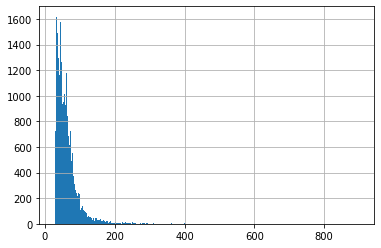

In [67]:
flats_sales_data['total_area'].hist(bins=300)

count    21707.000000
mean        61.881608
std         36.450043
min         28.000000
25%         40.000000
50%         54.000000
75%         71.600000
max        900.000000
Name: total_area, dtype: float64


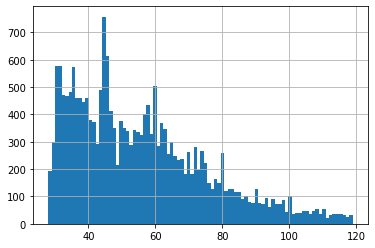

In [68]:
total_area_borders = make_hist_by_serie(flats_sales_data['total_area'])

Больше всех квартир находяться в районе от 30 до 65 кв.м. Выбросы сыше 300 кв.м. обусловлены либо большими планировками либо отдельными частными домами.

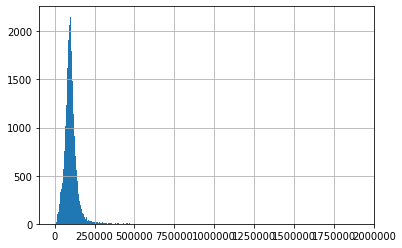

In [69]:
flats_sales_data['price_per_metre'].hist(bins=300)

count    2.170700e+04
mean     1.007506e+05
std      5.121922e+04
min      1.118300e+02
25%      7.769077e+04
50%      9.580838e+04
75%      1.150082e+05
max      1.907500e+06
Name: price_per_metre, dtype: float64


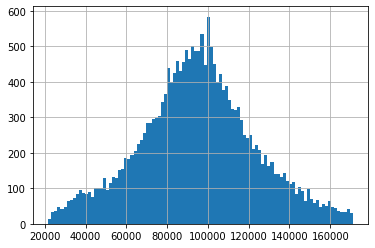

In [70]:
price_per_metre_borders = make_hist_by_serie(flats_sales_data['price_per_metre'])

Больше всех квартир находяться в районе от 60 до 130 тыс. рублей за кв.м.

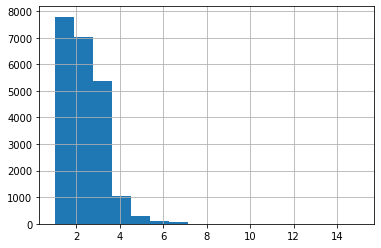

In [71]:
flats_sales_data['rooms'].hist(bins=16)

count    21707.000000
mean         2.062008
std          1.052666
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         15.000000
Name: rooms, dtype: float64


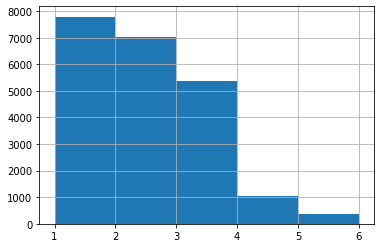

In [72]:
rooms_borders = make_hist_by_serie(flats_sales_data['rooms'])

Здесь закономерность имеет верную природы. Работа с данными не требует корректировки.

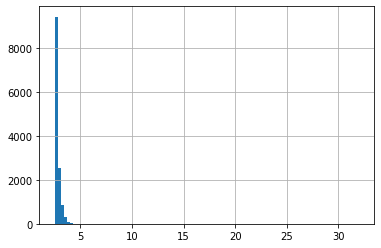

In [73]:
flats_sales_data['ceiling_height'].hist(bins=100)

count    13364.000000
mean         2.769466
std          0.896651
min          2.500000
25%          2.550000
50%          2.650000
75%          2.800000
max         32.000000
Name: ceiling_height, dtype: float64


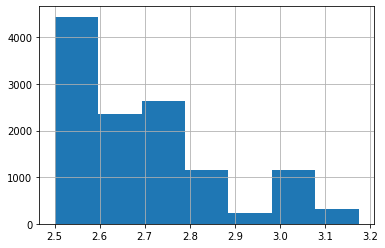

In [74]:
ceiling_height_borders = make_hist_by_serie(flats_sales_data['ceiling_height'])

Большинсво кварnир имеют высоту от 2.5 до 2.75 м.

Избавимся от выбросов по значимым для нас факторам: площадь, цена, число комнат, высота потолков. Созданная функция дает границы значимых данных и исключает выбросы в них.

In [75]:
print('Количество значений до удаления выбросов:', flats_sales_data.shape[0])
good_by_area_flats_sales_data = flats_sales_data.query(
    '@total_area_borders[0] <= total_area <=  @total_area_borders[1]')
print('Количество значений хороших по общей площади:', good_by_area_flats_sales_data.shape[0])
good_by_price_per_metre_flats_sales_data = flats_sales_data.query(
    '@price_per_metre_borders[0] <= price_per_metre <=  @price_per_metre_borders[1]')
print('Количество значений хороших по цене за кв.м.:', good_by_price_per_metre_flats_sales_data.shape[0])
good_by_rooms_flats_sales_data = flats_sales_data.query(
    '@rooms_borders[0] <= rooms <=  @rooms_borders[1]')
print('Количество значений хороших по поличеству комнат:', good_by_rooms_flats_sales_data.shape[0])
good_by_ceiling_height_flats_sales_data = flats_sales_data.query(
    '@ceiling_height_borders[0] <= ceiling_height <=  @ceiling_height_borders[1]')
print('Количество значений хороших по высоте потолков:', good_by_ceiling_height_flats_sales_data.shape[0])

Количество значений до удаления выбросов: 21707
Количество значений хороших по общей площади: 20604
Количество значений хороших по цене за кв.м.: 20638
Количество значений хороших по поличеству комнат: 21628
Количество значений хороших по высоте потолков: 12306


Проведем поочередный отсев выбросов и создадим финальную выборку. Выбросы по цене и высоте потолков будем игнорировать.

In [76]:
old_new_len_flats_sales_data = flats_sales_data.shape[0]
flats_sales_data = (flats_sales_data
                    .query('@total_area_borders[0] <= total_area <=  @total_area_borders[1]')
                    .query('@rooms_borders[0] <= rooms <=  @rooms_borders[1]')
            )
print('Количество значений до обработки:',old_new_len_flats_sales_data)
print('Количество значений после обработки:',flats_sales_data.shape[0])
print('Процент удаленных данных:', '{:.2%}'.format(
    (old_new_len_flats_sales_data - flats_sales_data.shape[0])/old_new_len_flats_sales_data))

Количество значений до обработки: 21707
Количество значений после обработки: 20604
Процент удаленных данных: 5.08%


#### Время продажи квартиры

Изучим общие данные по времени продажи квартиры и построем гистограмму.

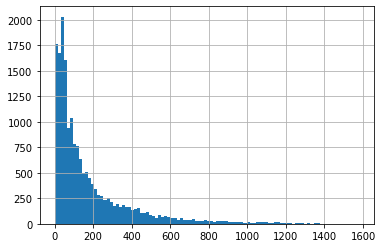

In [77]:
flats_sales_data['days_exposition'].hist(bins=100)

count    17970.000000
mean       177.424875
std        215.038608
min          1.000000
25%         45.000000
50%         94.500000
75%        226.000000
max       1580.000000
Name: days_exposition, dtype: float64


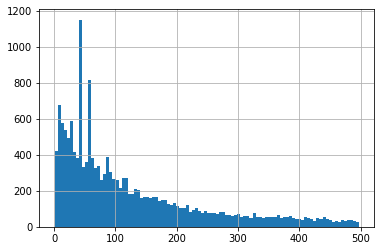

In [78]:
days_exposition_borders = make_hist_by_serie(flats_sales_data['days_exposition'])

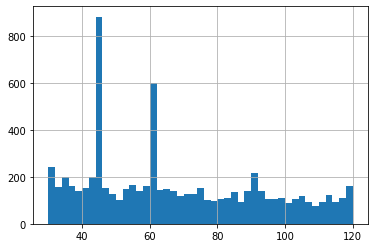

In [79]:
flats_sales_data['days_exposition'].hist(bins=45, range=(30,120))

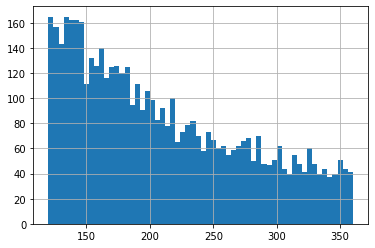

In [80]:
flats_sales_data['days_exposition'].hist(bins=60, range=(120,360))

Ответы на вопросы:

1. Посчитайте среднее и медиану. 
Среднее значение - 176 дня. Медианное - 94 дней.
2. Опишите, сколько обычно занимает продажа. 
Обычно в крупных городах России квартира продается за 30-120 дней, продажи квартир могут затянуться до 180-360 дней. Текущий диапазон находится в хорошей зоне в 1-4 месяца.
3. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
Быстрые продажи - странный фактор о договорной продажи через сервис или мошеннические действия. Считаю быстрые продажи до 7 дней. Необычно долгие продажи те, которые длятся больше года (360 дней).

#### Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

Создадим срез от 7 дней до 360.

count    14781.000000
mean       106.985184
std         87.370712
min          7.000000
25%         42.000000
50%         78.000000
75%        155.000000
max        359.000000
Name: days_exposition, dtype: float64


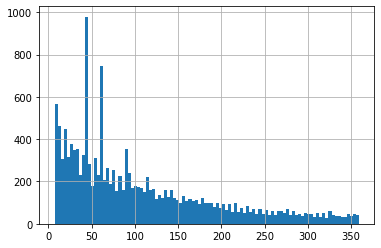

In [81]:
flats_sales_data_by_days_exposition = flats_sales_data.query('7 <= days_exposition <= 360')
print(flats_sales_data_by_days_exposition['days_exposition'].describe())
flats_sales_data_by_days_exposition['days_exposition'].hist(bins=100)

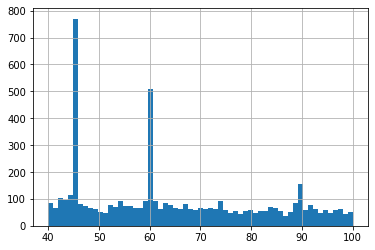

In [82]:
flats_sales_data_by_days_exposition['days_exposition'].hist(bins=61, range=(40,100))

Много квартир продается за 45 и 60 дней. Так же есть локальный пик в 90 дней. Имеются техники риэлторов , которые продают квартиры за 45, 60 или 90 дней как главное правильно своей работы.

Проведем удаление выбросов по дням продажи. Возьмем за левую границу 7 дней, за правую - правую границу в по квантилям 496.

In [83]:
old_new_len_flats_sales_data = flats_sales_data.shape[0]
flats_sales_data = flats_sales_data.query('7 <= days_exposition <= @days_exposition_borders[1]')
print('Количество значений до обработки:',old_new_len_flats_sales_data)
print('Количество значений после обработки:',flats_sales_data.shape[0])
print('Процент удаленных данных:', '{:.2%}'.format(
    (old_new_len_flats_sales_data - flats_sales_data.shape[0])/old_new_len_flats_sales_data))

Количество значений до обработки: 20604
Количество значений после обработки: 15963
Процент удаленных данных: 22.52%


#### Стоимость квартиры

1. Какие факторы больше всего влияют на стоимость квартиры? 

По общей информации на стоимость квартиры влияет ее местоположение (в центра города - на окранине, в хорошем районе - в неблагополучном, близко от местро/транспортных узлов или нет), тип жилья (частный дом - квартира, новый дом - хрущевка/аварийный, наличие лифта или другой инфраструктуры), расположение квартиры в доме (какой этаж, сколько квартир на этаж), площадь и планировка квартиры, вид из окна и общее состояние квартиры (новая, с ремонтом, без ремонта).

2. Изучите, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. 

Составим корреляционные зависимости предложенных факторов.

In [84]:
prise_area_rooms_center = flats_sales_data.loc[:,['price_per_metre', 'total_area', 'rooms', 'cityCenters_nearest']]
prise_area_rooms_center.head()

,price_per_metre,total_area,rooms,cityCenters_nearest
1,82920.79,40.40,1,18603.0
4,100000.00,100.00,2,8098.0
5,95065.79,30.40,1,NaN
6,99195.71,37.30,1,19143.0
8,87454.76,33.16,1,NaN


In [85]:
prise_area_rooms_center.corr()

,price_per_metre,total_area,rooms,cityCenters_nearest
price_per_metre,1.000000,0.109402,-0.091826,-0.385946
total_area,0.109402,1.000000,0.831965,-0.194138
rooms,-0.091826,0.831965,1.000000,-0.121749
cityCenters_nearest,-0.385946,-0.194138,-0.121749,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f34b59cc310>,
      dtype=object)

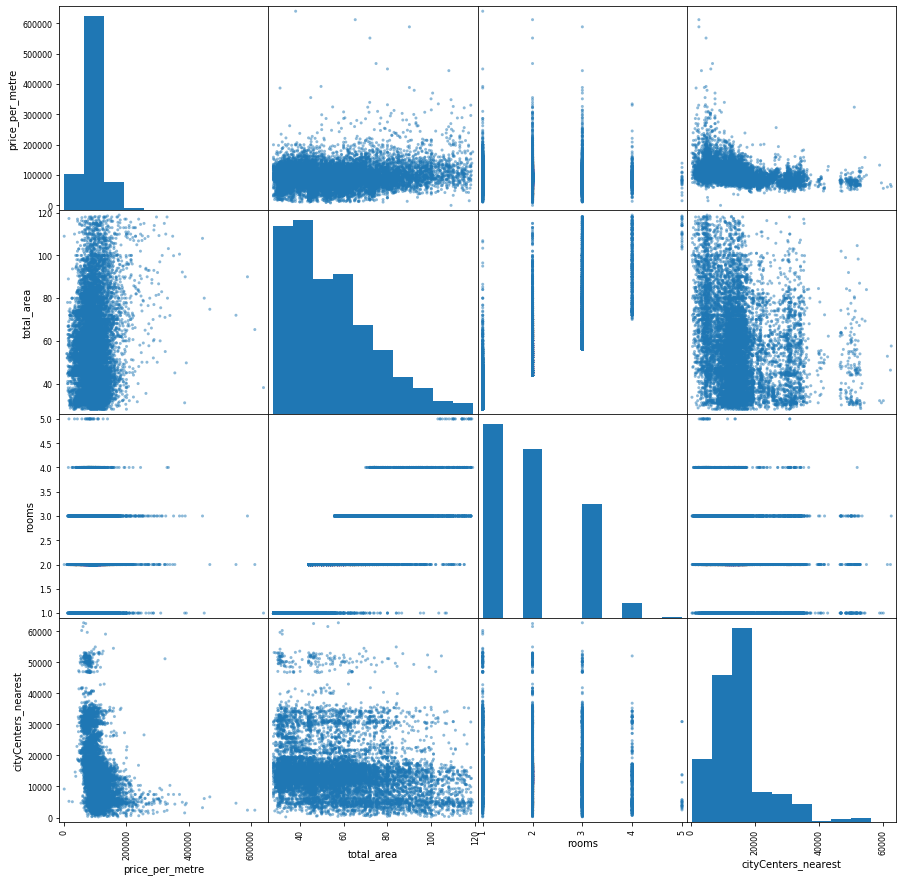

In [86]:
pd.plotting.scatter_matrix(prise_area_rooms_center, figsize=(15, 15))

В целом получаем:

- Цена имеет слабую зависимость от площади. Большинство квартир продаются в районе от 60 тыс. до 140 тыс за кв. м. с площадью от 28 кв.м. до 80 кв.м.
- Количество комнат отрицательно влияет на стоимость, но слабо. Комнаты напрямую определяют размер общей площади. Самые распространенные квартиры имеют от 1 до 3 комнат.
- Дальность от центра уменьшает стоимость достаточно. Это и логично - чем ближе к центру, тем легче до него добраться. Основной поток квартир сконцентрирован на расстоянии до 20 км.


3. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 

Построим гистограммы для каждой категории и выделим укрупненный диапозон с ценой.

count      1836.000000
mean      80184.705986
std       31182.474596
min        9615.380000
25%       61546.197500
50%       80745.510000
75%       96875.000000
max      387096.770000
Name: price_per_metre, dtype: float64


(9615.38, 149868.20375000002)

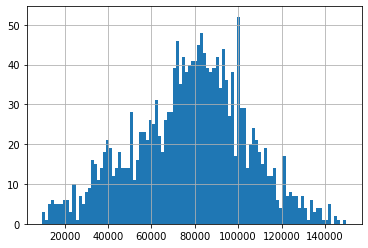

In [87]:
#print(flats_sales_data[flats_sales_data['floor_category'] == 'первый']['price_per_metre'].describe())
#flats_sales_data[flats_sales_data['floor_category'] == 'первый']['price_per_metre'].hist(bins=50)
make_hist_by_serie(flats_sales_data[flats_sales_data['floor_category'] == 'первый']['price_per_metre'])

Квартиры на первом этаже не популярны. Больше всего квартир продали за 60 тыс. за кв.м. и после  110 тыс. за кв.м. начинается спад по продажам этих квартир.

count      2122.000000
mean      88044.222526
std       35858.798832
min         111.830000
25%       66081.350000
50%       87712.220000
75%      106250.000000
max      370497.020000
Name: price_per_metre, dtype: float64


(5828.374999999978, 166502.975)

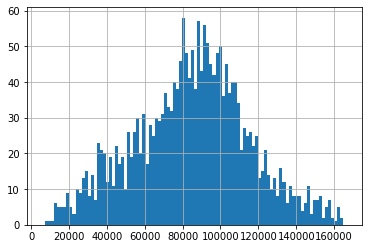

In [88]:
#print(flats_sales_data[flats_sales_data['floor_category'] == 'последний']['price_per_metre'].describe())
#flats_sales_data[flats_sales_data['floor_category'] == 'последний']['price_per_metre'].hist(bins=50)
make_hist_by_serie(flats_sales_data[flats_sales_data['floor_category'] == 'последний']['price_per_metre'])

Квартир на последнем этаже также много продали за 70 тыс. за кв. м. и спад начинается после 110 тыс. за кв.м. Однозначно квартиры на последнем этаже дороже, чем на первом.

count     12005.000000
mean      99491.953289
std       34298.307437
min       10897.440000
25%       80719.600000
50%       96969.700000
75%      114035.090000
max      640422.350000
Name: price_per_metre, dtype: float64


(30746.36500000002, 164008.32499999998)

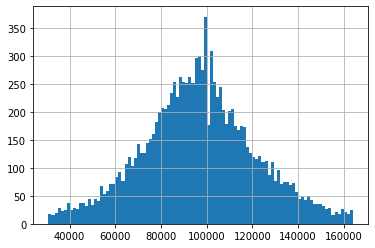

In [89]:
#print(flats_sales_data[flats_sales_data['floor_category'] == 'другой']['price_per_metre'].describe())
#flats_sales_data[flats_sales_data['floor_category'] == 'другой']['price_per_metre'].hist(bins=100)
make_hist_by_serie(flats_sales_data[flats_sales_data['floor_category'] == 'другой']['price_per_metre'])

Основные продажи квартир на остальных этажах проходят в районе от 75 тыс. за кв.м. до 120 тыс. за кв.м. и идет на спад. Это говорит о том, что другие этажи определенно стоят дороже, чем первые. Их стоимость в целом выше от квартир на последнем этаже, но нет так сильно. В целом люди платять болше за квартиры не на первом и не на последнем этаже.

4. Также изучите зависимость от даты размещения: дня недели, месяца и года.

Построим корреляционные зависимости.

In [90]:
prise_weekday_month_year = flats_sales_data.loc[:,['price_per_metre', 'weekday', 'month', 'year']]
prise_weekday_month_year.head()

,price_per_metre,weekday,month,year
1,82920.79,1,12,2018
4,100000.00,1,6,2018
5,95065.79,0,9,2018
6,99195.71,3,11,2017
8,87454.76,2,5,2018


In [91]:
prise_weekday_month_year.corr()

,price_per_metre,weekday,month,year
price_per_metre,1.000000,-0.001581,-0.003167,0.056032
weekday,-0.001581,1.000000,0.009253,-0.005467
month,-0.003167,0.009253,1.000000,-0.219971
year,0.056032,-0.005467,-0.219971,1.000000


Матрица корреляции имеет слабые зависимости. Пройдемся по каждому столбцу, чтобы подтвертить эту гипотезу. Начнем с дня недели.

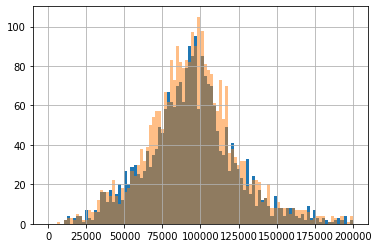

In [92]:
#print(prise_weekday_month_year[prise_weekday_month_year['weekday'] == 0]['last_price'].describe())
prise_weekday_month_year[prise_weekday_month_year['weekday'] == 0]['price_per_metre'].hist(bins=100, range=(0,200000))
prise_weekday_month_year[prise_weekday_month_year['weekday'] == 1]['price_per_metre'].hist(bins=100, range=(0,200000), alpha=0.5)

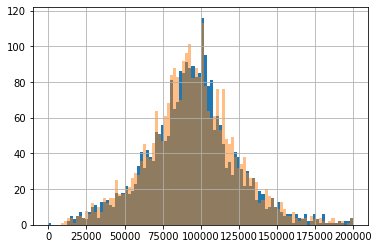

In [93]:
prise_weekday_month_year[prise_weekday_month_year['weekday'] == 2]['price_per_metre'].hist(bins=100, range=(0,200000))
prise_weekday_month_year[prise_weekday_month_year['weekday'] == 3]['price_per_metre'].hist(bins=100, range=(0,200000), alpha=0.5)

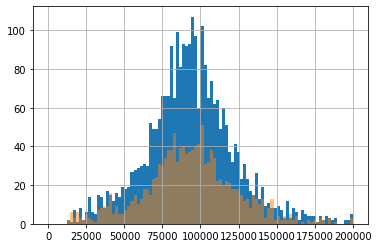

In [94]:
prise_weekday_month_year[prise_weekday_month_year['weekday'] == 4]['price_per_metre'].hist(bins=100, range=(0,200000))
prise_weekday_month_year[prise_weekday_month_year['weekday'] == 5]['price_per_metre'].hist(bins=100, range=(0,200000), alpha=0.5)

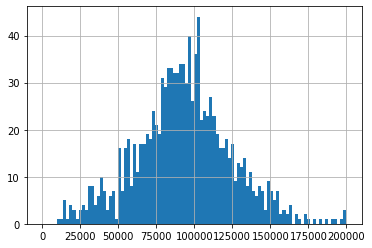

In [95]:
prise_weekday_month_year[prise_weekday_month_year['weekday'] == 6]['price_per_metre'].hist(bins=100, range=(0,200000))

В общей картине стомость квартиры не зависит от дня продажи. Единственное что меняется - это количество проданных квартир. Больше всего квартир продают за будние дни, когда у риелторов и агенств основной режим работы.

Изучим гистограммы по столбцу месяцев.

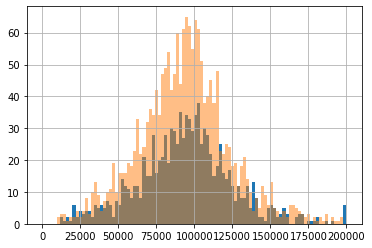

In [96]:
prise_weekday_month_year[prise_weekday_month_year['month'] == 1]['price_per_metre'].hist(bins=100, range=(0,200000) )
prise_weekday_month_year[prise_weekday_month_year['month'] == 2]['price_per_metre'].hist(bins=100, range=(0,200000), alpha=0.5)

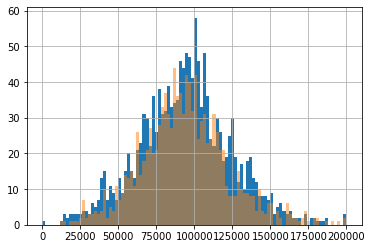

In [97]:
prise_weekday_month_year[prise_weekday_month_year['month'] == 3]['price_per_metre'].hist(bins=100, range=(0,200000))
prise_weekday_month_year[prise_weekday_month_year['month'] == 4]['price_per_metre'].hist(bins=100, range=(0,200000), alpha=0.5)

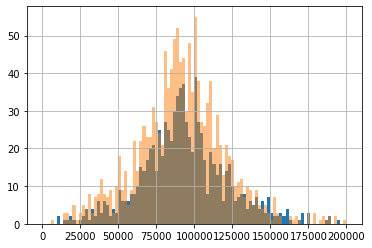

In [98]:
prise_weekday_month_year[prise_weekday_month_year['month'] == 5]['price_per_metre'].hist(bins=100, range=(0,200000))
prise_weekday_month_year[prise_weekday_month_year['month'] == 6]['price_per_metre'].hist(bins=100, range=(0,200000), alpha=0.5)

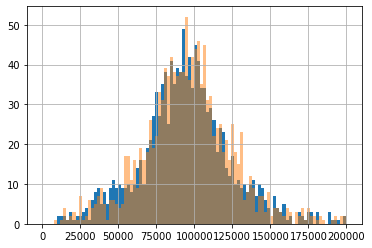

In [99]:
prise_weekday_month_year[prise_weekday_month_year['month'] == 7]['price_per_metre'].hist(bins=100, range=(0,200000))
prise_weekday_month_year[prise_weekday_month_year['month'] == 8]['price_per_metre'].hist(bins=100, range=(0,200000), alpha=0.5)

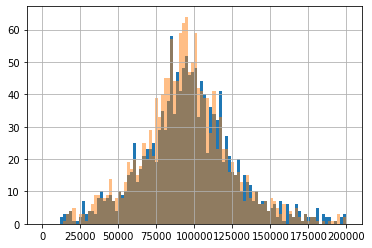

In [100]:
prise_weekday_month_year[prise_weekday_month_year['month'] == 9]['price_per_metre'].hist(bins=100, range=(0,200000))
prise_weekday_month_year[prise_weekday_month_year['month'] == 10]['price_per_metre'].hist(bins=100, range=(0,200000), alpha=0.5)

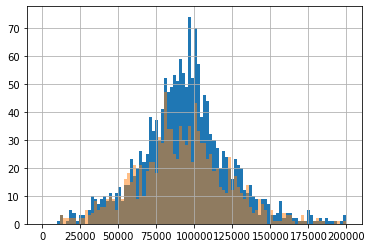

In [101]:
prise_weekday_month_year[prise_weekday_month_year['month'] == 11]['price_per_metre'].hist(bins=100, range=(0,200000))
prise_weekday_month_year[prise_weekday_month_year['month'] == 12]['price_per_metre'].hist(bins=100, range=(0,200000), alpha=0.5)

По графикам видно, что основные продажи так же идут от 75 тыс. за кв.м. до 110 тыс. за кв.м.каждый месяц. Отличается лишь количество продаж на декабрь и январь. В эти месяцы меньше всего продаж квартир.

Пройдемся по столбцу год.

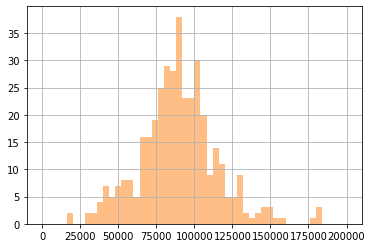

In [102]:
prise_weekday_month_year[prise_weekday_month_year['year'] == 2014]['price_per_metre'].hist(bins=50, range=(0,200000))
prise_weekday_month_year[prise_weekday_month_year['year'] == 2015]['price_per_metre'].hist(bins=50, range=(0,200000), alpha=0.5)

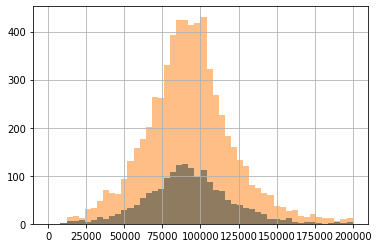

In [103]:
prise_weekday_month_year[prise_weekday_month_year['year'] == 2016]['price_per_metre'].hist(bins=50, range=(0,200000))
prise_weekday_month_year[prise_weekday_month_year['year'] == 2017]['price_per_metre'].hist(bins=50, range=(0,200000), alpha=0.5)

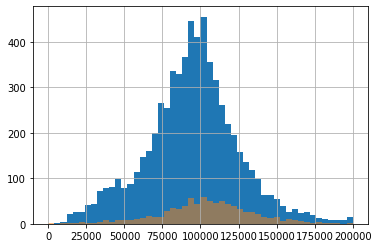

In [104]:
prise_weekday_month_year[prise_weekday_month_year['year'] == 2018]['price_per_metre'].hist(bins=50, range=(0,200000))
prise_weekday_month_year[prise_weekday_month_year['year'] == 2019]['price_per_metre'].hist(bins=50, range=(0,200000), alpha=0.5)

По графикам видно небольшое смещение пика вправо. Легкая положительная зависимость есть, она исходит из инфляции в стране.

#### Выберите 10 населённых пунктов с наибольшим числом объявлений. 

1. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. 
2. Выделите населённые пункты с самой высокой и низкой стоимостью жилья

Для оптимизации поиска названия применим функцию для создания коротких имен, чтобы исключить дубликаты.

In [105]:
flats_sales_data['short_locality_name'] = flats_sales_data['locality_name'].apply(make_short_name)
top_10_locality_name = flats_sales_data['short_locality_name'].value_counts()[:10]
print(top_10_locality_name)
top_10_locality_name = top_10_locality_name.index
top_10_locality_name

Санкт-Петербург    10565
Мурино               429
Шушары               356
Кудрово              348
Всеволожск           276
Парголово            264
Колпино              251
Пушкин               237
Гатчина              193
Выборг               156
Name: short_locality_name, dtype: int64


Index(['Санкт-Петербург', 'Мурино', 'Шушары', 'Кудрово', 'Всеволожск',
       'Парголово', 'Колпино', 'Пушкин', 'Гатчина', 'Выборг'],
      dtype='object')

In [106]:
top_10_pivot_table_mean = (flats_sales_data
                      .query('short_locality_name in @top_10_locality_name')
                      .pivot_table(index='short_locality_name', values='price_per_metre', aggfunc='mean')
                      .sort_values('price_per_metre', ascending=False))
top_10_pivot_table_mean

,price_per_metre
short_locality_name,
Санкт-Петербург,108946.194180
Пушкин,101437.079578
Кудрово,93765.785833
Парголово,89169.300303
Мурино,84725.644382
Шушары,77217.221320
Колпино,74933.086932
Всеволожск,69214.339094
Гатчина,68911.945907


In [107]:
top_10_pivot_table_min_max = (flats_sales_data
                      .query('short_locality_name in @top_10_locality_name')
                      .pivot_table(index='short_locality_name', values='price_per_metre', aggfunc=['min','max']))
top_10_pivot_table_min_max

,min,max
,price_per_metre,price_per_metre
short_locality_name,,
Всеволожск,31400.00,640422.35
Выборг,18750.00,85227.27
Гатчина,10897.44,105818.18
Колпино,47957.37,125000.00
Кудрово,54160.35,142857.14
Мурино,51460.48,138580.25
Парголово,48405.47,138522.43
Пушкин,59836.07,256521.74


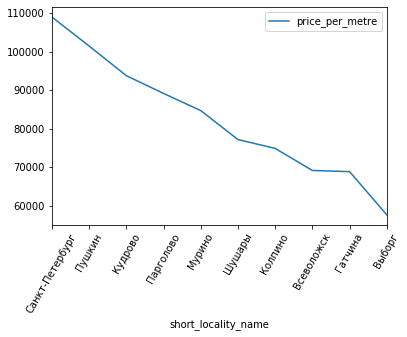

In [108]:
top_10_pivot_table_mean.plot(kind='line', rot=60)

Из данных видно во все лидеры вырвался Санкт-Петербург. 

#### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. 

1. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. 
2. После этого посчитайте среднюю цену для каждого километра. 
3. Постройте график: он должен показывать, как цена зависит от удалённости от центра. 
4. Определите границу, где график сильно меняется — это и будет центральная зона.

In [109]:
SP_flats_sales_data = flats_sales_data.query('locality_name == "Санкт-Петербург"')
SP_flats_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10565 entries, 4 to 23690
Data columns (total 31 columns):
total_images            10565 non-null int64
last_price              10565 non-null int64
total_area              10565 non-null float64
first_day_exposition    10565 non-null object
rooms                   10565 non-null int64
ceiling_height          6454 non-null float64
floors_total            10565 non-null int64
living_area             10565 non-null float64
floor                   10565 non-null int64
is_apartment            10565 non-null bool
studio                  10565 non-null bool
open_plan               10565 non-null bool
kitchen_area            10565 non-null float64
balcony                 10565 non-null int64
locality_name           10565 non-null object
airports_nearest        10532 non-null float64
cityCenters_nearest     10547 non-null float64
parks_around3000        10565 non-null int64
parks_nearest           4667 non-null float64
ponds_around3000        1

In [110]:
SP_flats_sales_data['kilometers_from_center'] = (SP_flats_sales_data['cityCenters_nearest']/1000).round()
SP_flats_sales_data['kilometers_from_center'].value_counts().index

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Float64Index([15.0, 12.0, 13.0, 16.0, 14.0, 11.0, 17.0, 10.0,  5.0,  9.0,  8.0,
               4.0,  6.0,  7.0, 18.0,  3.0, 22.0,  2.0, 19.0,  1.0, 21.0, 23.0,
              26.0, 20.0, 24.0, 25.0,  0.0, 28.0, 29.0, 27.0],
             dtype='float64')

In [111]:
price_per_km = (SP_flats_sales_data
               .pivot_table(index='kilometers_from_center', values='price_per_metre', aggfunc='mean'))
price_per_km

,price_per_metre
kilometers_from_center,
0.0,125916.745000
1.0,133754.153294
2.0,138712.794276
3.0,114056.521751
4.0,126998.871392
5.0,133523.014090
6.0,132994.246192
7.0,131672.959688
8.0,121656.560601


In [112]:
plot_price_per_km = price_per_km
plot_price_per_km['km'] = price_per_km.index
plot_price_per_km

,price_per_metre,km
kilometers_from_center,,
0.0,125916.745000,0.0
1.0,133754.153294,1.0
2.0,138712.794276,2.0
3.0,114056.521751,3.0
4.0,126998.871392,4.0
5.0,133523.014090,5.0
6.0,132994.246192,6.0
7.0,131672.959688,7.0
8.0,121656.560601,8.0


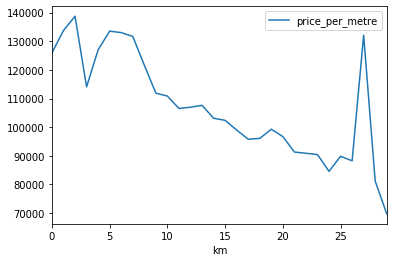

In [113]:
price_per_km.plot(x='km', y='price_per_metre' ,kind='line')

Центральной зоной можно считать квартиры в радиусе 3 км от цента Санкт-Петербурга. Локальный пик в районе 5-7 км обусловлен инфраструктурой. Локальный пик в 27 км обусловлен дороговизной квартир в Петергофе.

#### Выделите сегмент квартир в центре. 

1. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. 
2. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 
3. Сделайте выводы. Отличаются ли они от общих выводов по всему городу?


In [114]:
SP_center_flats_sales_data = SP_flats_sales_data.query('kilometers_from_center <= 3')
SP_center_flats_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 24 to 23602
Data columns (total 32 columns):
total_images              424 non-null int64
last_price                424 non-null int64
total_area                424 non-null float64
first_day_exposition      424 non-null object
rooms                     424 non-null int64
ceiling_height            281 non-null float64
floors_total              424 non-null int64
living_area               424 non-null float64
floor                     424 non-null int64
is_apartment              424 non-null bool
studio                    424 non-null bool
open_plan                 424 non-null bool
kitchen_area              424 non-null float64
balcony                   424 non-null int64
locality_name             424 non-null object
airports_nearest          424 non-null float64
cityCenters_nearest       424 non-null float64
parks_around3000          424 non-null int64
parks_nearest             328 non-null float64
ponds_around3000        

count    424.000000
mean      74.931509
std       21.521850
min       28.600000
25%       58.750000
50%       75.100000
75%       92.000000
max      118.000000
Name: total_area, dtype: float64


(28.6, 118.0)

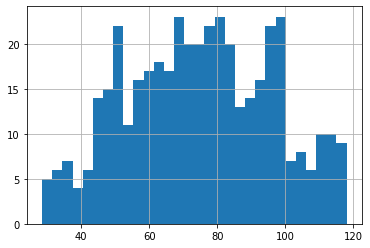

In [115]:
#print(SP_center_flats_sales_data['total_area'].describe())
#SP_center_flats_sales_data['total_area'].hist(bins=30)
make_hist_by_serie(SP_center_flats_sales_data['total_area'],30)

В центре много больших квартир от 45 до 100 кв.м. 

count       424.000000
mean     127124.102736
std       57144.795678
min       63524.590000
25%       95234.375000
50%      112236.800000
75%      136752.890000
max      612557.430000
Name: price_per_metre, dtype: float64


(63524.59, 199030.66250000003)

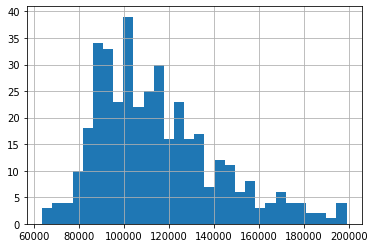

In [116]:
#make_hist_by_serie(SP_center_flats_sales_data['price_per_metre'])
#print(SP_center_flats_sales_data['price_per_metre'].describe())
make_hist_by_serie(SP_center_flats_sales_data['price_per_metre'],30)

Стоимость этих квартир в среднем выше. Если для всей выборки пик был в районе от 80 до 130 за кв.м., то здесь пик смещен от 80 тыс. за кв.м. до 140 тыс. за кв.м.

count    424.000000
mean       2.549528
std        0.910875
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: rooms, dtype: float64


(1.0, 4.5)

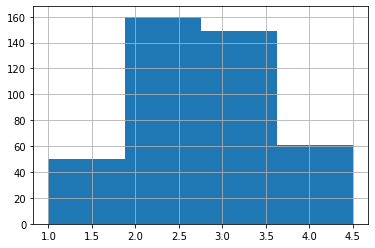

In [117]:
#print(SP_center_flats_sales_data['rooms'].describe())
#SP_center_flats_sales_data['rooms'].hist(bins=4)
make_hist_by_serie(SP_center_flats_sales_data['rooms'],4)

В центре больше всего квартир с 2-3 комнатами.

count    281.000000
mean       3.260569
std        1.473936
min        2.500000
25%        2.960000
50%        3.130000
75%        3.400000
max       27.000000
Name: ceiling_height, dtype: float64


(2.5, 4.06)

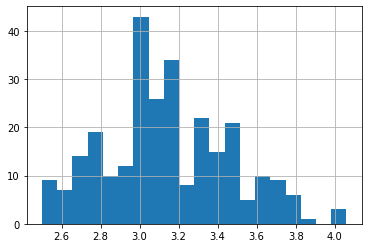

In [118]:
#print(SP_center_flats_sales_data['ceiling_height'].describe())
#SP_center_flats_sales_data['ceiling_height'].hist(bins=30, range=(2,5))
make_hist_by_serie(SP_center_flats_sales_data['ceiling_height'],20)

Самая популярная высота потолка 3 м, и также много квартир с высотой до 3.2 м.

Проведем корреляционные матрицы для остальных факторов по тому же принципу.

In [119]:
SP_center_prise_area_rooms_center = SP_center_flats_sales_data.loc[:,['price_per_metre', 'total_area', 'rooms', 'cityCenters_nearest']]
SP_center_prise_area_rooms_center.corr()

,price_per_metre,total_area,rooms,cityCenters_nearest
price_per_metre,1.000000,-0.057372,-0.170704,-0.127416
total_area,-0.057372,1.000000,0.727668,-0.106523
rooms,-0.170704,0.727668,1.000000,-0.029051
cityCenters_nearest,-0.127416,-0.106523,-0.029051,1.000000


Зависмимость от общей площади сменила знак, но осталось слабой.

In [120]:
SP_center_prise_weekday_month_year = SP_center_flats_sales_data.loc[:,['price_per_metre', 'weekday', 'month', 'year']]
SP_center_prise_weekday_month_year.corr()

,price_per_metre,weekday,month,year
price_per_metre,1.000000,0.025644,-0.076931,0.137564
weekday,0.025644,1.000000,0.056526,-0.019028
month,-0.076931,0.056526,1.000000,-0.216447
year,0.137564,-0.019028,-0.216447,1.000000


Тоже похоже на основные показатели данных.

Проведем сравнительные выводы между центром города и общей выборкой.

count    15963.000000
mean        54.691013
std         19.351776
min         28.000000
25%         39.000000
50%         50.800000
75%         66.000000
max        118.900000
Name: total_area, dtype: float64


(28.0, 106.5)

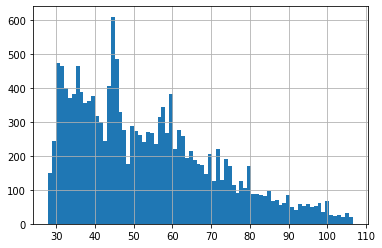

In [121]:
make_hist_by_serie(flats_sales_data['total_area'])

count    424.000000
mean      74.931509
std       21.521850
min       28.600000
25%       58.750000
50%       75.100000
75%       92.000000
max      118.000000
Name: total_area, dtype: float64


(28.6, 118.0)

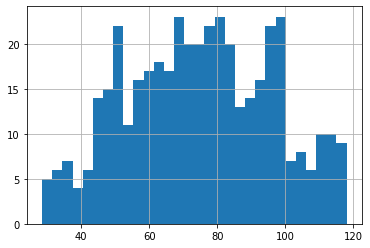

In [122]:
#print(flats_sales_data['total_area'].describe())
#SP_center_flats_sales_data['total_area'].describe()
make_hist_by_serie(SP_center_flats_sales_data['total_area'],30)

Медиана и среднее выше, чем  у всей выборки. Это значит, что в центре больше просторных квартир. 

count     15963.000000
mean      95749.537031
std       34836.926161
min         111.830000
25%       76829.270000
50%       94142.860000
75%      111295.845000
max      640422.350000
Name: price_per_metre, dtype: float64


(25129.40750000001, 162995.7075)

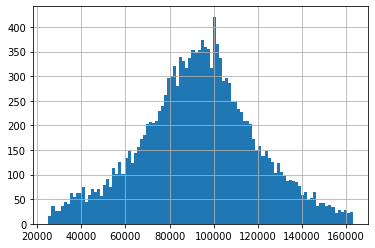

In [123]:
make_hist_by_serie(flats_sales_data['price_per_metre'])

count       424.000000
mean     127124.102736
std       57144.795678
min       63524.590000
25%       95234.375000
50%      112236.800000
75%      136752.890000
max      612557.430000
Name: price_per_metre, dtype: float64


(63524.59, 199030.66250000003)

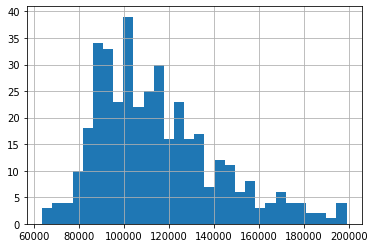

In [124]:
#print(flats_sales_data['price_per_metre'].describe())
#SP_center_flats_sales_data['price_per_metre'].describe()
make_hist_by_serie(SP_center_flats_sales_data['price_per_metre'],30)

Медиана выросла на 18 тысяч, а среднее на 32 тысяч. Высокая цена оправдывает местоположение квартир в центре.

count    15963.000000
mean         1.900833
std          0.866117
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64


(1.0, 5.0)

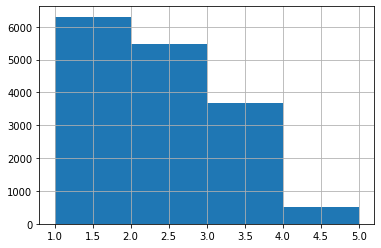

In [125]:
make_hist_by_serie(flats_sales_data['rooms'])

count    424.000000
mean       2.549528
std        0.910875
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: rooms, dtype: float64


(1.0, 4.5)

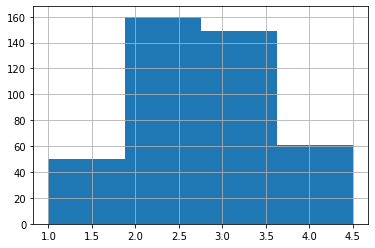

In [126]:
#print(flats_sales_data['rooms'].describe())
#SP_center_flats_sales_data['rooms'].describe()
make_hist_by_serie(SP_center_flats_sales_data['rooms'],4)

В центре больше квартир с количеством комнат с 2 до 3, когда из общих данных много квартир с 1-4 комнатами.

count    9289.000000
mean        2.734925
std         0.876885
min         2.500000
25%         2.530000
50%         2.650000
75%         2.760000
max        27.000000
Name: ceiling_height, dtype: float64


(2.5, 3.1049999999999995)

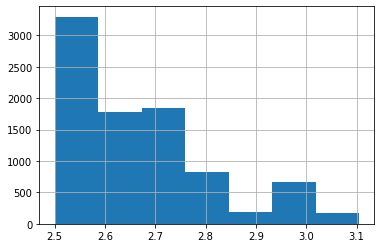

In [127]:
make_hist_by_serie(flats_sales_data['ceiling_height'])

count    281.000000
mean       3.260569
std        1.473936
min        2.500000
25%        2.960000
50%        3.130000
75%        3.400000
max       27.000000
Name: ceiling_height, dtype: float64


(2.5, 4.06)

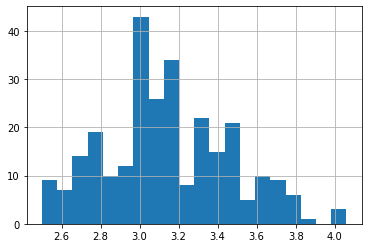

In [128]:
#print(flats_sales_data['ceiling_height'].describe())
#SP_center_flats_sales_data['ceiling_height'].describe()
make_hist_by_serie(SP_center_flats_sales_data['ceiling_height'],20)

Медиана и средняя высота потолков выше в центре. Это означает, что в центре города у людей больше простора из-за типа застроек.

In [129]:
print(prise_area_rooms_center.corr())
SP_center_prise_area_rooms_center.corr()

                     price_per_metre  total_area     rooms  \
price_per_metre             1.000000    0.109402 -0.091826   
total_area                  0.109402    1.000000  0.831965   
rooms                      -0.091826    0.831965  1.000000   
cityCenters_nearest        -0.385946   -0.194138 -0.121749   

                     cityCenters_nearest  
price_per_metre                -0.385946  
total_area                     -0.194138  
rooms                          -0.121749  
cityCenters_nearest             1.000000  


,price_per_metre,total_area,rooms,cityCenters_nearest
price_per_metre,1.000000,-0.057372,-0.170704,-0.127416
total_area,-0.057372,1.000000,0.727668,-0.106523
rooms,-0.170704,0.727668,1.000000,-0.029051
cityCenters_nearest,-0.127416,-0.106523,-0.029051,1.000000


Квартиры в центре имеют меньше зависимостей от площади или удаленности от центра.

Выросла зависимость от количество комнат в 2 раза.

In [130]:
print(prise_weekday_month_year.corr())
SP_center_prise_weekday_month_year.corr()

                 price_per_metre   weekday     month      year
price_per_metre         1.000000 -0.001581 -0.003167  0.056032
weekday                -0.001581  1.000000  0.009253 -0.005467
month                  -0.003167  0.009253  1.000000 -0.219971
year                    0.056032 -0.005467 -0.219971  1.000000


,price_per_metre,weekday,month,year
price_per_metre,1.000000,0.025644,-0.076931,0.137564
weekday,0.025644,1.000000,0.056526,-0.019028
month,-0.076931,0.056526,1.000000,-0.216447
year,0.137564,-0.019028,-0.216447,1.000000


Здесь имеется небольшой прирост положительной кореляции от дня недели. 

Кореляция по месяцу выросла в 25 раз. Это означает в центре неохотней покупаю под конец года.

С зависимостью от года произошло увеличение в 2.5 раз и сохранила свой знак.

Выведем это на графиках по параметрам.

Цена от общей площади.

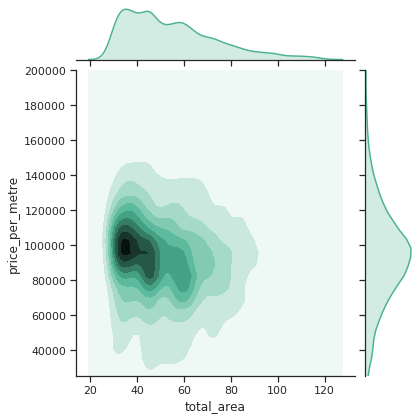

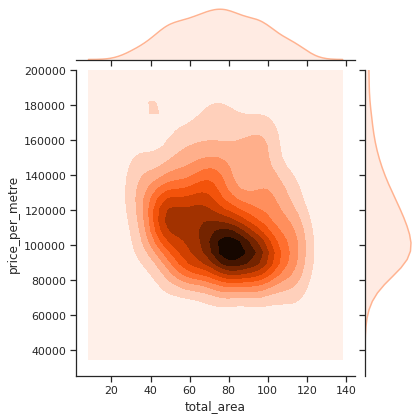

In [131]:
sns.set(style='ticks')
        
x = flats_sales_data['total_area']
y = flats_sales_data['price_per_metre']
sns.jointplot(x, y, kind="kde", color="#4CB391",  ylim = (25000,200000))

x = SP_center_flats_sales_data['total_area']
y = SP_center_flats_sales_data['price_per_metre']
sns.jointplot(x, y, kind="kde", color="#FFB391", ylim = (25000,200000))

Цена от количества комнат.

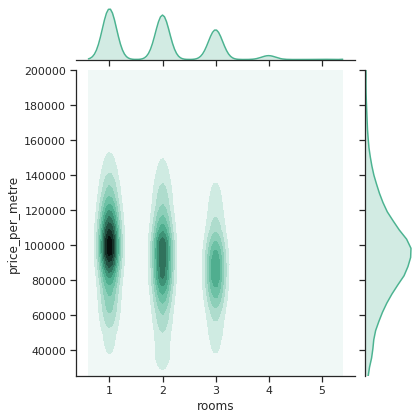

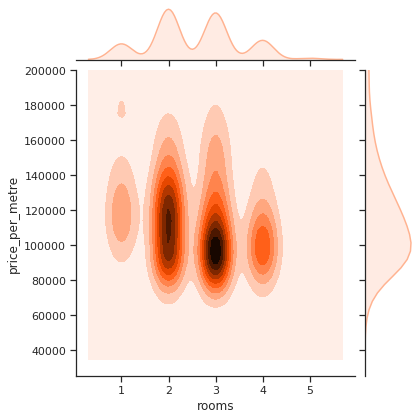

In [132]:
sns.set(style='ticks')
        
x = flats_sales_data['rooms']
y = flats_sales_data['price_per_metre']
sns.jointplot(x, y, kind="kde", color="#4CB391", ylim = (25000,200000))

x = SP_center_flats_sales_data['rooms']
y = SP_center_flats_sales_data['price_per_metre']
sns.jointplot(x, y, kind="kde", color="#FFB391", ylim = (25000,200000))

Цена от высоты потолков.

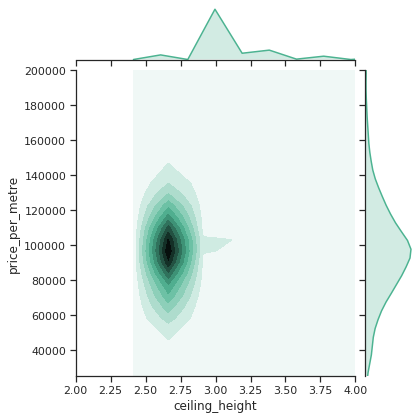

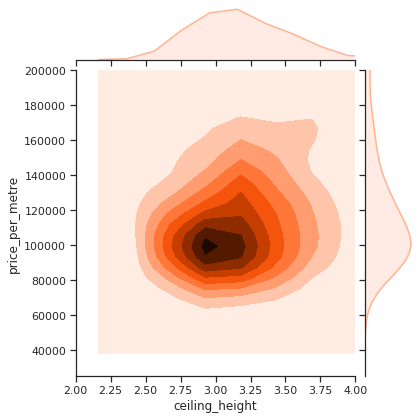

In [133]:
sns.set(style='ticks')
        
x = flats_sales_data['ceiling_height']
y = flats_sales_data['price_per_metre']
sns.jointplot(x, y, kind="kde", color="#4CB391", ylim = (25000,200000), xlim = (2,4))

x = SP_center_flats_sales_data['ceiling_height']
y = SP_center_flats_sales_data['price_per_metre']
sns.jointplot(x, y, kind="kde", color="#FFB391", ylim = (25000,200000), xlim = (2,4))

Цена от удаленности от центра.

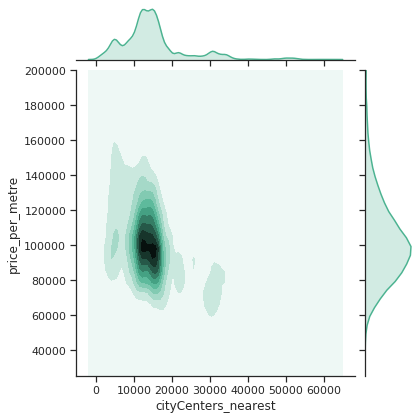

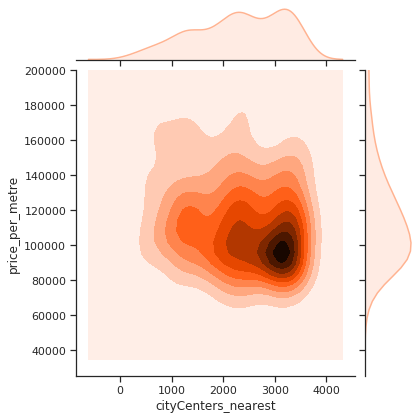

In [134]:
sns.set(style='ticks')
        
x = flats_sales_data['cityCenters_nearest']
y = flats_sales_data['price_per_metre']
sns.jointplot(x, y, kind="kde", color="#4CB391", ylim = (25000,200000))

x = SP_center_flats_sales_data['cityCenters_nearest']
y = SP_center_flats_sales_data['price_per_metre']
sns.jointplot(x, y, kind="kde", color="#FFB391", ylim = (25000,200000))

Цена от деня недели.

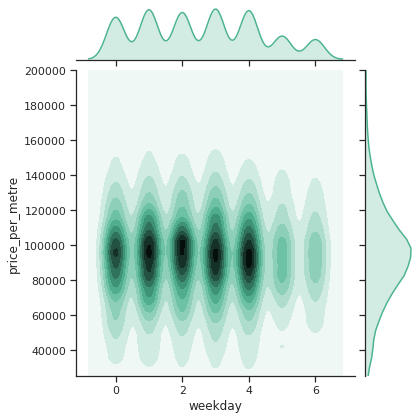

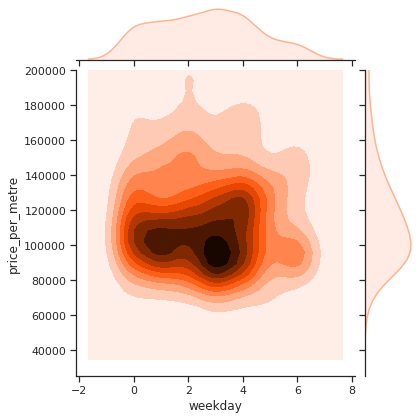

In [135]:
sns.set(style='ticks')
        
x = flats_sales_data['weekday']
y = flats_sales_data['price_per_metre']
sns.jointplot(x, y, kind="kde", color="#4CB391", ylim = (25000,200000))

x = SP_center_flats_sales_data['weekday']
y = SP_center_flats_sales_data['price_per_metre']
sns.jointplot(x, y, kind="kde", color="#FFB391", ylim = (25000,200000))

Цена от месяца.

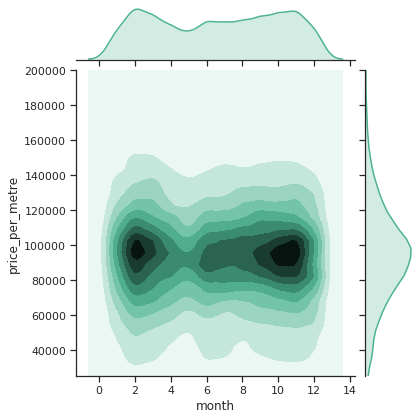

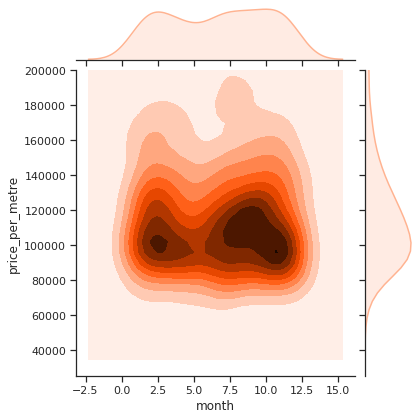

In [136]:
sns.set(style='ticks')
        
x = flats_sales_data['month']
y = flats_sales_data['price_per_metre']
sns.jointplot(x, y, kind="kde", color="#4CB391", ylim = (25000,200000))

x = SP_center_flats_sales_data['month']
y = SP_center_flats_sales_data['price_per_metre']
sns.jointplot(x, y, kind="kde", color="#FFB391", ylim = (25000,200000))

Цена от года.

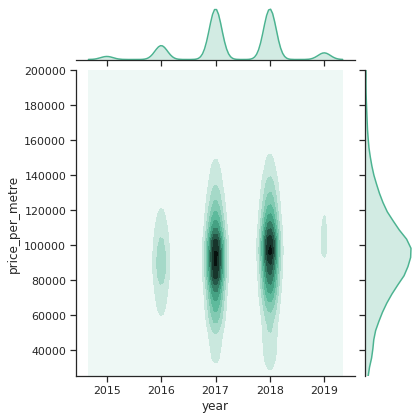

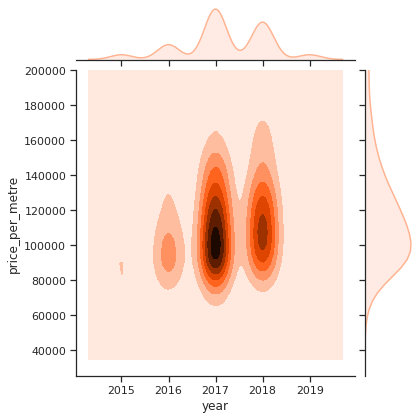

In [137]:
sns.set(style='ticks')
        
x = flats_sales_data['year']
y = flats_sales_data['price_per_metre']
sns.jointplot(x, y, kind="kde", color="#4CB391", ylim = (25000,200000))

x = SP_center_flats_sales_data['year']
y = SP_center_flats_sales_data['price_per_metre']
sns.jointplot(x, y, kind="kde", color="#FFB391", ylim = (25000,200000))

Использование данных палитр дает наглядное представление характерных отличий всех данных (изумрудный цвет(#4CB391)) от данных в  центре Санкт-Петербурга(оранжевый цвет(#FFB391)).

### Вывод

Проведя анализ данных по зависимостям цены за квадратный метр по отношению к другим факторам имеются следующие выводы:

- Для проживания в городе люди пытаются найти квартиры стоимостью 80 тыс. +- 20 тыс. за кв.м. с как минимум одной комнатой, потолком в 2.7 метра и планировкой от 40 кв.м.
- Основные продажи квартир случаются через 30 - 200 дней. Большнство обусловлены планами риэлторов и системами продаж.
- На стоимость квартиры положительно влияет общая площадь, количество комнат, год продажи, отрицательно - количество комнат, удаленность от центра, день и месяц продажи.
- Санкт-Петербур имеет самую большую стоимость и самую большую стоимость за кв.м.
- В центре квартиры в целом лучше и их цена оправдана их местоположением.

## Итоговый вывод

Проведена большая работа по данному проекту.

1. Были определены аномалии и построена стратегия замены пропусков.
2. Пропуски были заполнены максимально возможными способами, чтобы каждое значение могло влиять на гипотезы.
3. Приведены типы данных для уменьшения используемой памяти и отображаемого вида в таблице.
4. Созданы дополнительные столбцы для улучшения анализа данных.
5. Даны ответы на заданные вопросы.

Система готова использовать следущие параметры для оценки стоимости недвижимости. 

- Основным ориентиром для определения стоимости квартиры - это стоимость квадратного метра.
- Общая площадь, отношения жилой к общей и отношение кухонной к общей площади помогут определить самый предпочитаемый тип квартир.
- Даты продаж позволят определить, в какой момент лучше продвигать рекламную компанию по продаже домов. В какие месяцы или дни недели. Количество продаж по годам имеет естественную зависимость от количество жителей города.
- Этаж квартиры. В большинстве случаев люди редко берут квартиры на первм этаже из-за их небезопасности, а квартиры на последним - из-за возможных проблем с крышей. Соотвественно самыми дорогими считаются комфортные квартиры между первым и последним этажом.
- Пригороды к Санкт-Петербургу имеют тенденцию к снижению цен за квартиру ввиду отсуствия престижа.
- Центр города в целом имеет хорошие квартиры и планировки и соотвественно одни из самых больших по стоимости квартир в районе.